# Assignment 5: Voice Signal Filtering with IIR and FIR Filters

--> To understand the differences between FIR and IIR filters by applying both types to their voice signals.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter, freqz, firwin, group_delay
from scipy.stats import linregress

### 1. Part 1: Recording/Uploading and Processing Voice Signal
- Record or Upload Your Voice:
  - Option 1: Record your voice using a microphone and Python (with libraries like sounddevice or pyaudio). Record yourself saying a phrase of at least 5 seconds.
  - Option 2: Upload a pre-recorded voice signal in .wav format (or another audio format supported by Python).
  - Set the sampling frequency to 16 kHz or 44.1 kHz for the recording.

- Plot the Voice Signal:
  - Plot the time-domain representation of your voice signal using matplotlib. Label the axes properly.
  - Compute and display the frequency spectrum of the signal using Fast Fourier Transform (FFT)

In [69]:
#We can take the speech recorded for Assignment 2 (option 2)
fs, speech_signal = wav.read('C:/Users/sofyc/OneDrive/Desktop/UPEC/Data capture and processing/assignment 2/recording_my_speech.wav')

#Checking of sampling frequency (fs) that was set to sampling frequency = 44.1 kHz
print(f'{fs} Hz')
#44100 Hz = 44.1 kHz

44100 Hz


In [70]:
#Duration = (number of samples) / (sampling frequency)
duration = len(speech_signal)/fs
print(f'{duration} seconds')

10.0 seconds


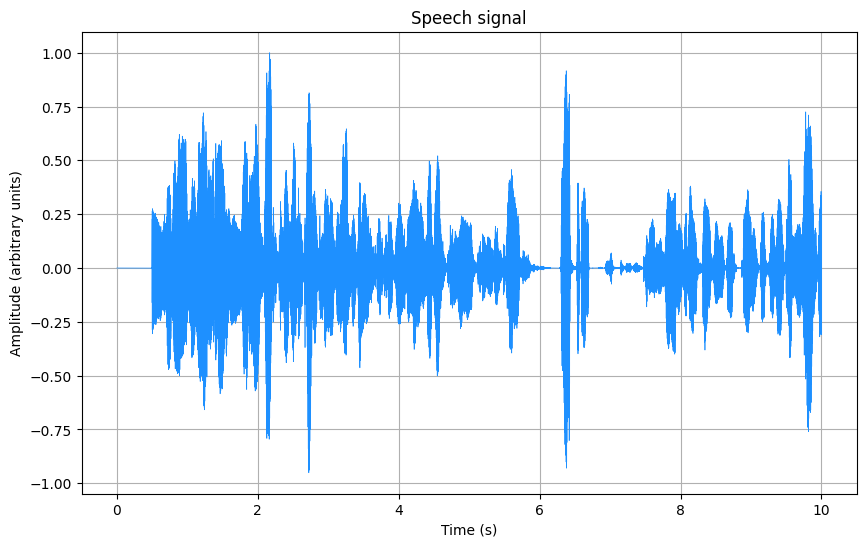

In [155]:
#Plot
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, duration, len(speech_signal)), speech_signal, color='dodgerblue', linewidth=0.5)
plt.title("Speech signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (arbitrary units)")
plt.grid(True)
plt.show()

In [72]:
#Applying the FFT
spectrum = fft(speech_signal) #Spectrum of the signal

#We take the correspondent frequencies of the samples of the Fourier transform
freq_FFT = fftfreq(len(speech_signal), 1/fs)
#We take just the half positive part of the spectrum's frequencies since they are simmetric to 0 for real signals
freq_FFT = freq_FFT[: len(speech_signal)//2]

#Magnitude
magnitude = np.abs(spectrum[: len(speech_signal) // 2])
#Transforming the magnitude in decibel
magnitude_dB = 20*np.log10(magnitude)

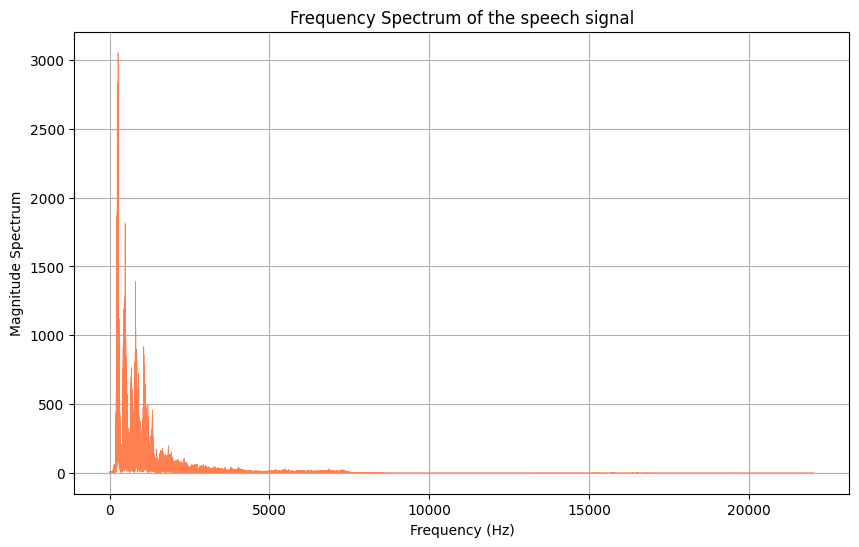

In [157]:
#Plot Magnitude Spectrum
plt.figure(figsize=(10, 6))
plt.plot(freq_FFT, magnitude, color="coral", linewidth=0.5)
plt.title("Frequency Spectrum of the speech signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude Spectrum")
plt.grid(True)
plt.show()

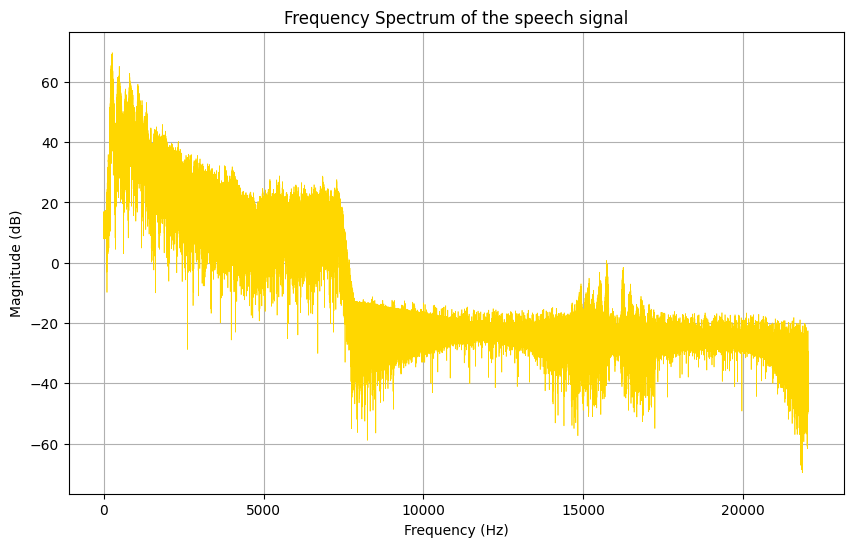

In [159]:
#Plot Magnitude (dB)
plt.figure(figsize=(10, 6))
plt.plot(freq_FFT, magnitude_dB, color="gold", linewidth=0.5)
plt.title("Frequency Spectrum of the speech signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

### 2. Part 2: IIR Filter Design and Application
- Design IIR Filters with Different Orders and Types:
  - Design IIR filters using the Python function scipy.signal.butter with three different filter orders: 2, 4, and 6.
  - Design three different types of filters:
    - Low-pass filter: with a cutoff frequency of 3 kHz.
    - High-pass filter: with a cutoff frequency of 500 Hz.
    - Band-pass filter: with cutoff frequencies of 500 Hz to 3 kHz.
  - Visualize the frequency response (magnitude response) of each IIR filter (low-pass, high-pass, band-pass) for the three different filter orders using scipy.signal.freqz.

- Filter the Original Voice Signal (Without Noise):
  - Apply each designed IIR filter (low-pass, high-pass, band-pass) to your voice signal using scipy.signal.lfilter.
  - Plot the filtered signal in both the time domain and frequency domain (FFT) for each filter type and filter order.
  - Compare the filtered signals to the original unfiltered signal. Analyze how the different filter orders and types affect the frequency content of the signal and the overall smoothness of the filtered output.

In [75]:
#Function structure taken from assignment 1. In this case we don't impose the order = 4 since we want to experiment with different filter orders.

#fs = 44100 Hz (sampling frequency)
high_cutoff = 3000  #cutoff frequency (Hz) of Low-pass filter
low_cutoff = 500  #cutoff frequency (Hz) of High-pass filter

#Function for Butterworth filter: a digital filter that doesn't introduce variation in the segnal of the band-pass (frequencies we want to maintain).
#Out of the band, the filter reduces gradually the amplitude of frequencies. This "lower" answer of the filter doesn't introduce distortions in the filtering of the signal.
#'butter' function calculates the coefficients of Butterworth filter that will be used to filter the signal.

#Low-pass Butterworth filter
def lowpass_butterworth(highcut, fs, order):
    nyquist = 0.5 * fs #Nyquist Theorem: f_sampling >= 2*f_max --> f_sampling = fs
    high = highcut / nyquist #normalized frequency
    b, a = butter(order, high, btype='low') #coefficients of Butterworth filter
    return b, a

#High-pass Butterworth filter
def highpass_butterworth(lowcut, fs, order):
    nyquist = 0.5 * fs #Nyquist Theorem: f_sampling >= 2*f_max --> f_sampling = fs
    low = lowcut / nyquist #normalized frequency
    b, a = butter(order, low, btype='high')
    return b, a

#Band-pass Butterworth filter
def bandpass_butterworth(lowcut, highcut, fs, order):
    #higher order means a narrower transition between the maintained (i.e. passed) band, and the chnged band, but this can cause distortions
    #analog=False since it is a digital filter
    nyquist = 0.5 * fs #Nyquist Theorem: f_sampling >= 2*f_max --> f_sampling = fs
    low = lowcut / nyquist #normalized frequency
    high = highcut / nyquist #normalized frequency
    b, a = butter(order, [low, high], btype='band') #coefficients of Butterworth filter
    return b, a

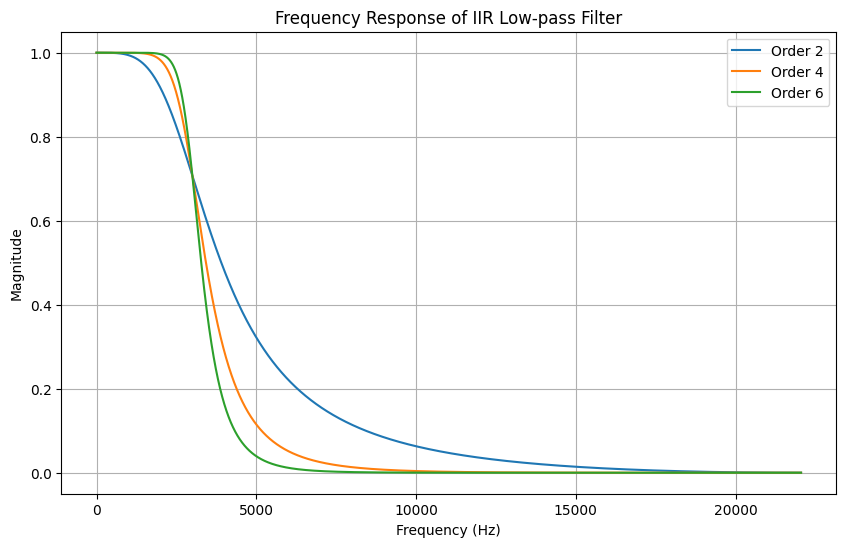

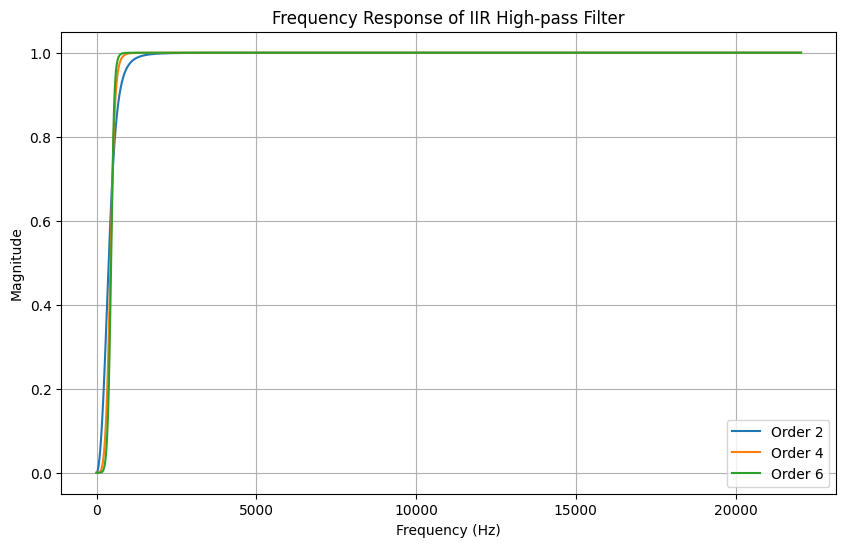

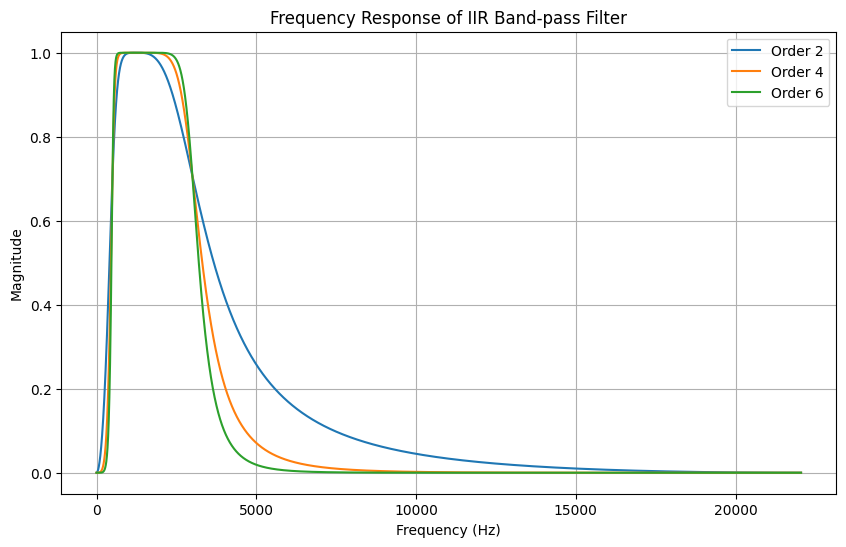

In [161]:
#Visualization of frequency response of the IIR filters: we can use the butterworth functions.
order_values = [2,4,6]

for filter_type in ['low', 'high', 'band']:
    plt.figure(figsize=(10, 6))
    for order in order_values:
        if filter_type == 'low':
            b, a = lowpass_butterworth(high_cutoff, fs, order)
        elif filter_type == 'high':
            b, a = highpass_butterworth(low_cutoff, fs, order)
        elif filter_type == 'band':
            b, a = bandpass_butterworth(low_cutoff, high_cutoff, fs, order)
        
        #Frequency response based on filter type
        w, h = freqz(b, a, worN=8000)
        #w: array of normalized frequencies in rad/s, h: magnitude values till those frequencies.
        #PER ME: worN=8000: Questo parametro definisce il numero di punti di frequenza su cui viene calcolata la risposta. 
        #Specificare worN=8000 significa che freqz calcola la risposta del filtro su 8000 punti tra 0 e la frequenza di Nyquist.
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label=f"Order {order}")
        #w is converted into Heartz from radiants, while abs(h) takes just the aplitude part of the magnitude.
    
    plt.title(f"Frequency Response of IIR {filter_type.capitalize()}-pass Filter")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.legend()
    plt.show()

In [77]:
#Functions of low-pass, high-pass, band-pass filter: here we use filtfilt to apply the filters to the signal. 
#These functions do the filtering for two times (one forward and one backward), to avoid distortions.

#IIR Low-pass filter
def IIR_lowpass_filter(data, highcut, fs, order):
    b, a = lowpass_butterworth(highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

#IIR High-pass filter
def IIR_highpass_filter(data, lowcut, fs, order):
    b, a = highpass_butterworth(lowcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

#IIR Band-pass filter
def IIR_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = bandpass_butterworth(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

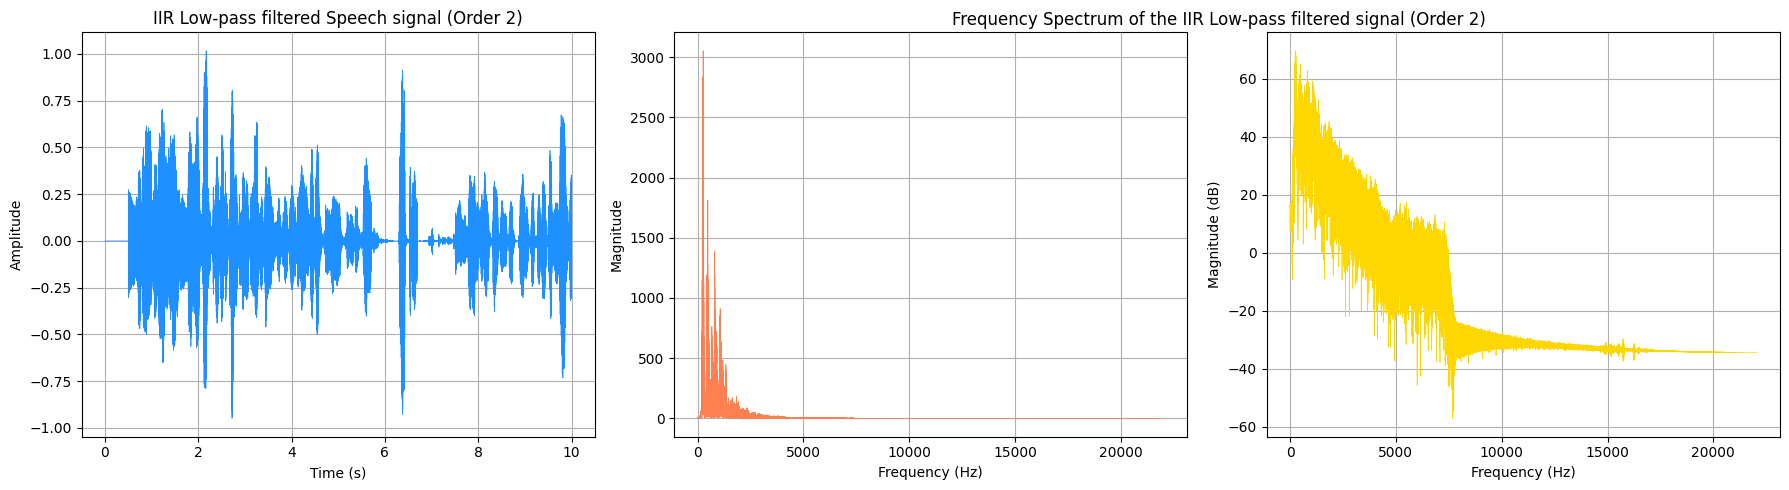

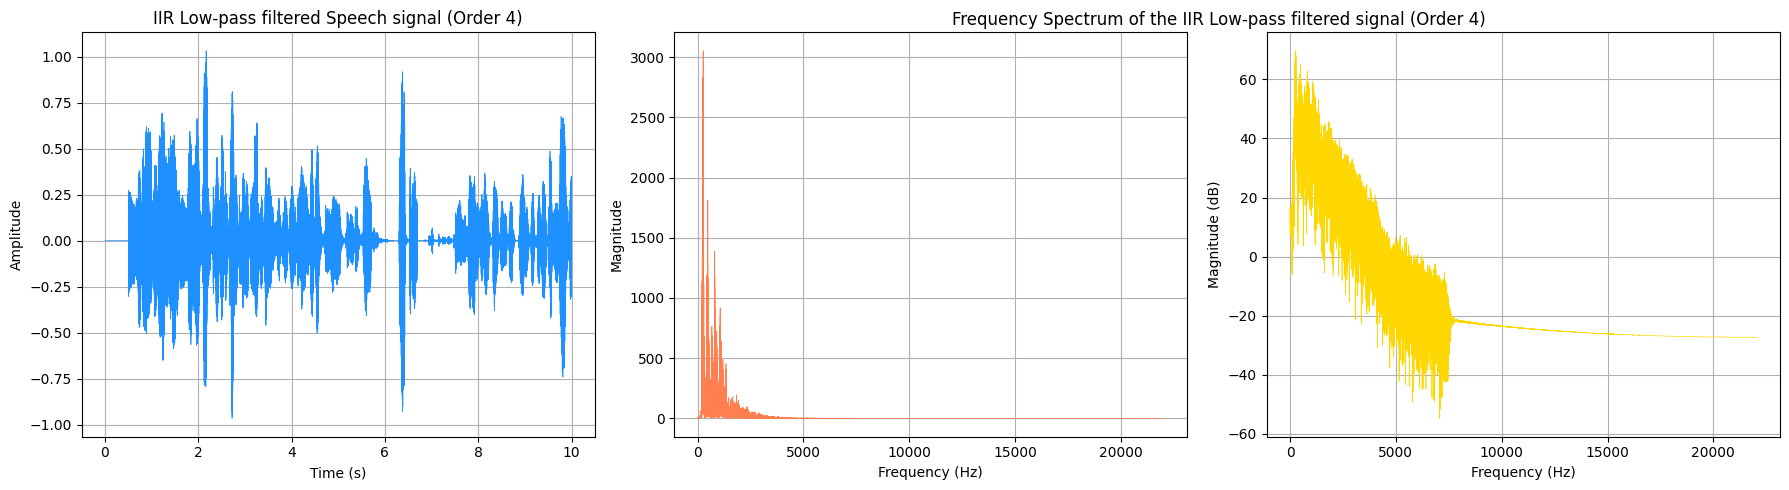

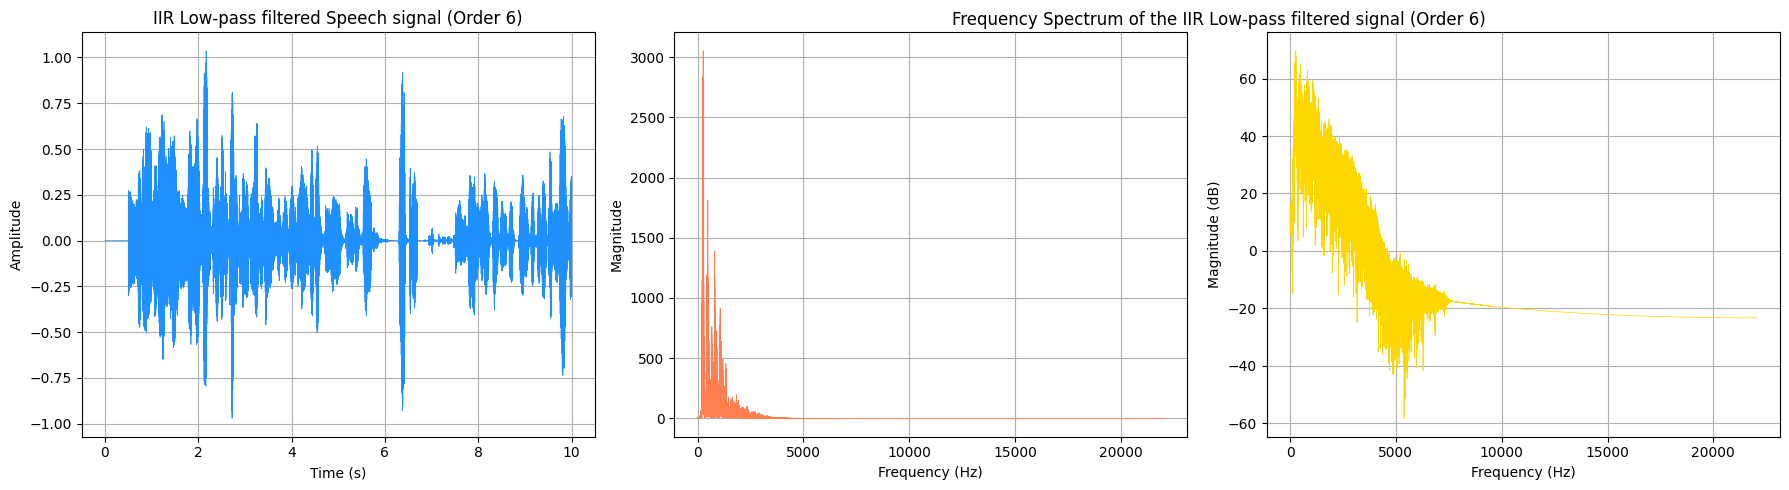

In [78]:
#Application of the IIR filters:
#IIR Low-pass filtered speech signal
low_magnitude_avg = []

for order in order_values:
    low_filtered_speech = IIR_lowpass_filter(speech_signal, high_cutoff, fs, order)
    
    #Duration
    duration_low_speech = len(low_filtered_speech) / fs

    #Spectrum
    spectrum_low = fft(low_filtered_speech)

    #Frequencies of the FFT
    freq_FFT_low = fftfreq(len(low_filtered_speech), 1/fs)
    freq_FFT_low = freq_FFT_low[: len(low_filtered_speech)//2]

    #Magnitude
    magnitude_low = np.abs(spectrum_low[: len(low_filtered_speech) // 2])
    #Average magnitude
    l_m_avg = np.mean(magnitude_low)
    low_magnitude_avg.append(l_m_avg)

    #Transforming the magnitude in decibel
    magnitude_low_dB = 20*np.log10(magnitude_low)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_low_speech, len(low_filtered_speech)), low_filtered_speech, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"IIR Low-pass filtered Speech signal (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_low, magnitude_low, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_low, magnitude_low_dB, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)

    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the IIR Low-pass filtered signal (Order {order})", ha='center', fontsize=12, color="black")
    
    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show() 

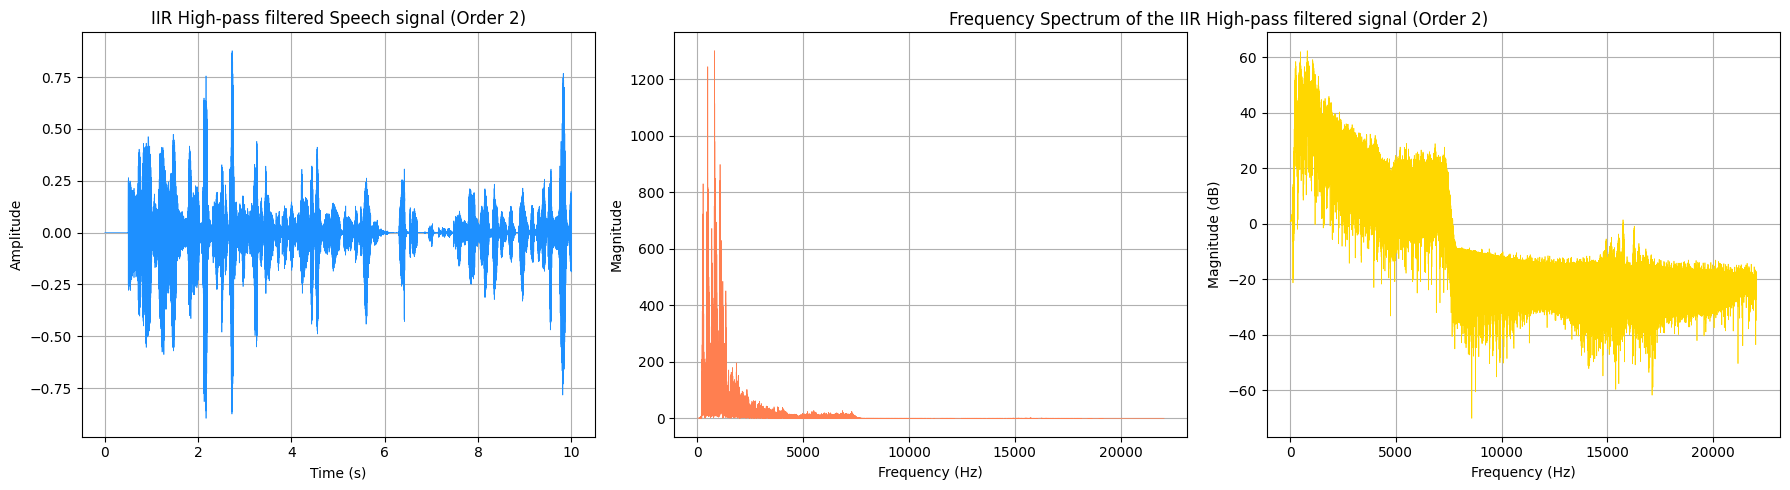

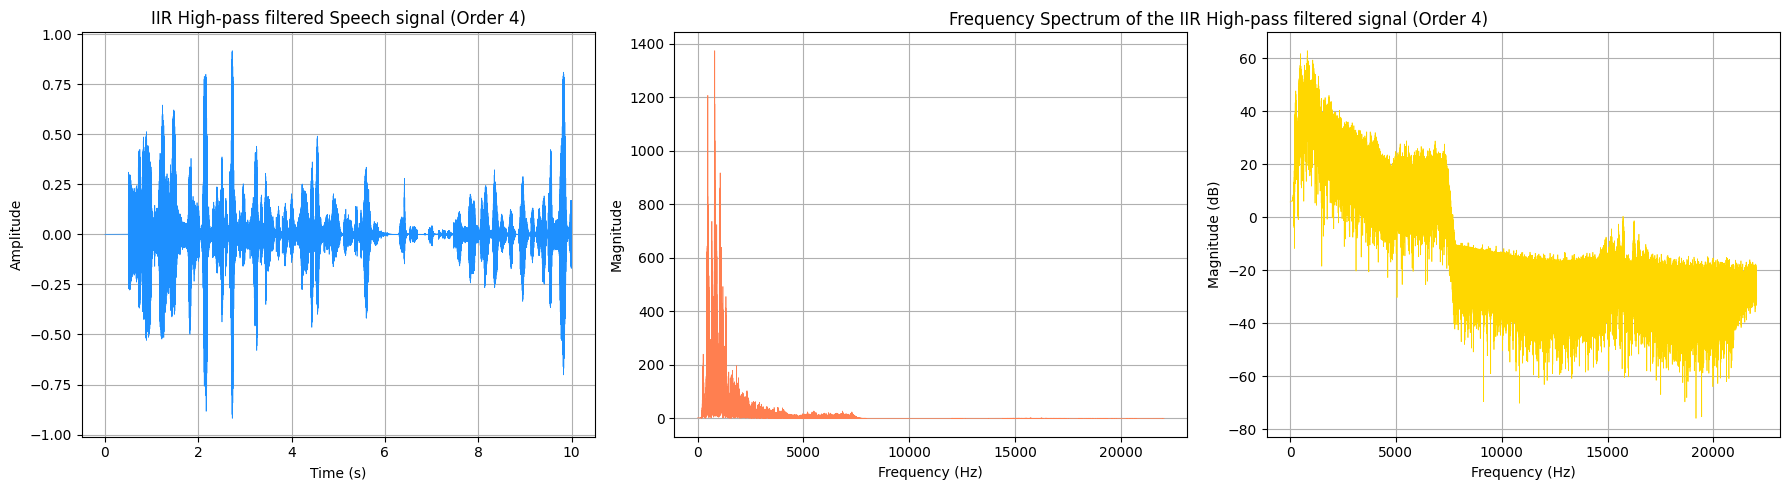

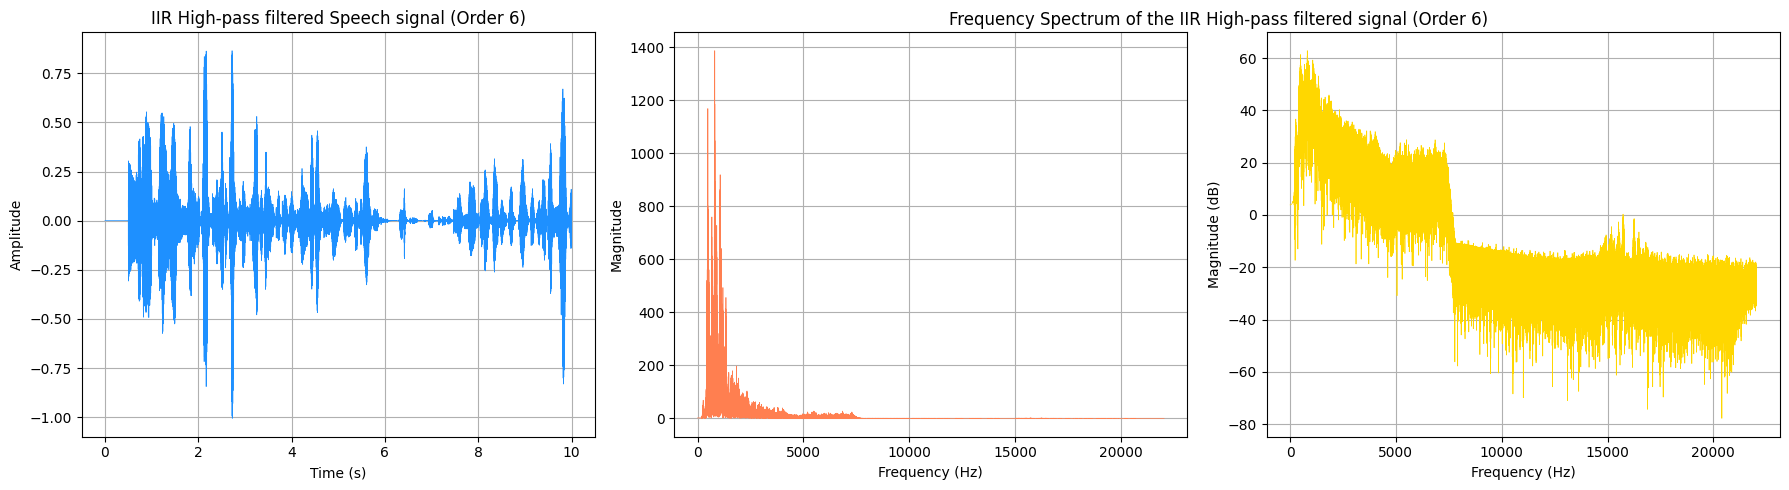

In [162]:
#IIR High-pass filtered speech signal
high_magnitude_avg = []

for order in order_values:
    high_filtered_speech = IIR_highpass_filter(speech_signal, low_cutoff, fs, order)
    
    #Duration
    duration_high_speech = len(high_filtered_speech) / fs

    #Spectrum
    spectrum_high = fft(high_filtered_speech)

    #Frequencies of the FFT
    freq_FFT_high = fftfreq(len(high_filtered_speech), 1/fs)
    freq_FFT_high = freq_FFT_high[: len(high_filtered_speech)//2]

    #Magnitude
    magnitude_high = np.abs(spectrum_high[: len(high_filtered_speech) // 2])
    #Average magnitude
    h_m_avg = np.mean(magnitude_high)
    high_magnitude_avg.append(h_m_avg)

    #Transforming the magnitude in decibel
    magnitude_high_dB = 20*np.log10(magnitude_high)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_high_speech, len(high_filtered_speech)), high_filtered_speech, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"IIR High-pass filtered Speech signal (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_high, magnitude_high, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_high, magnitude_high_dB, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)

    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the IIR High-pass filtered signal (Order {order})", ha='center', fontsize=12, color="black")
    
    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show() 

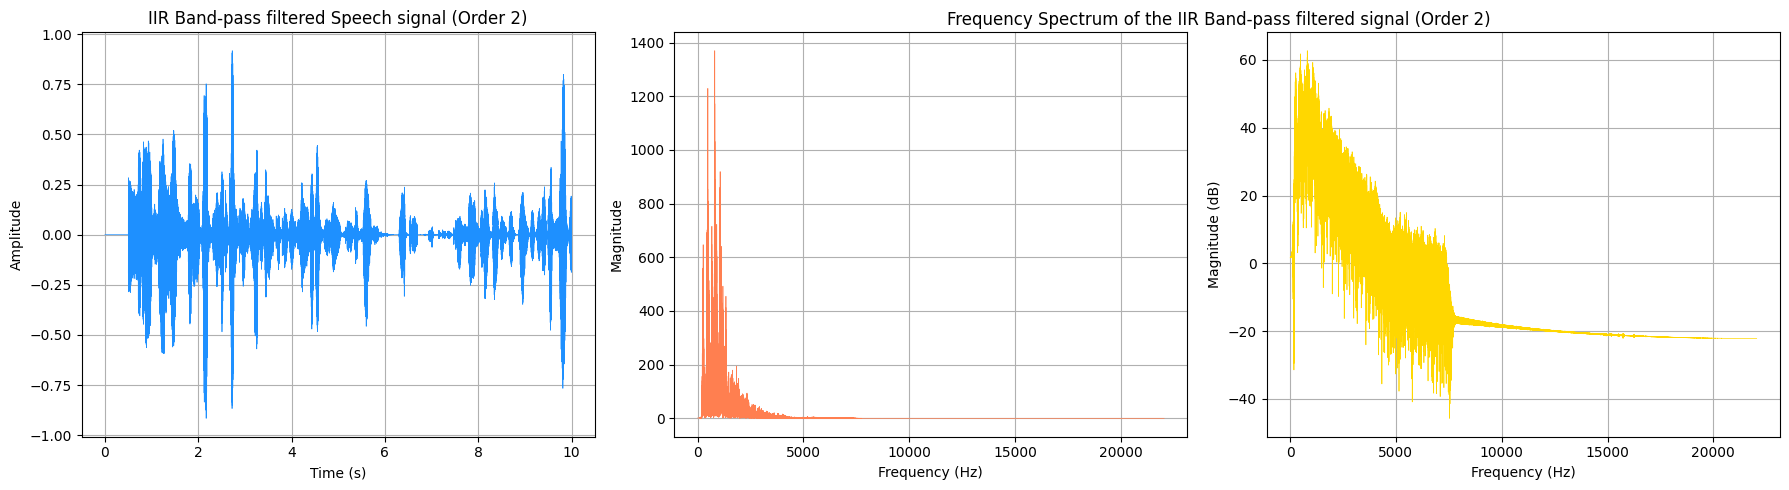

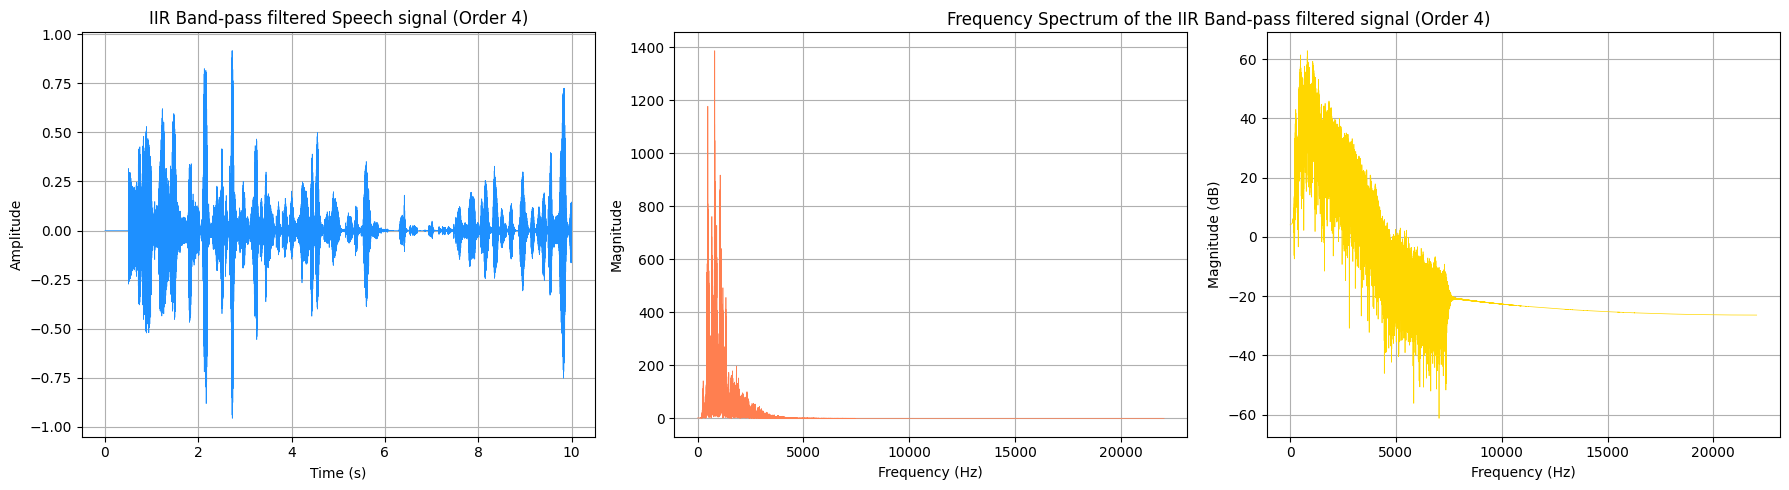

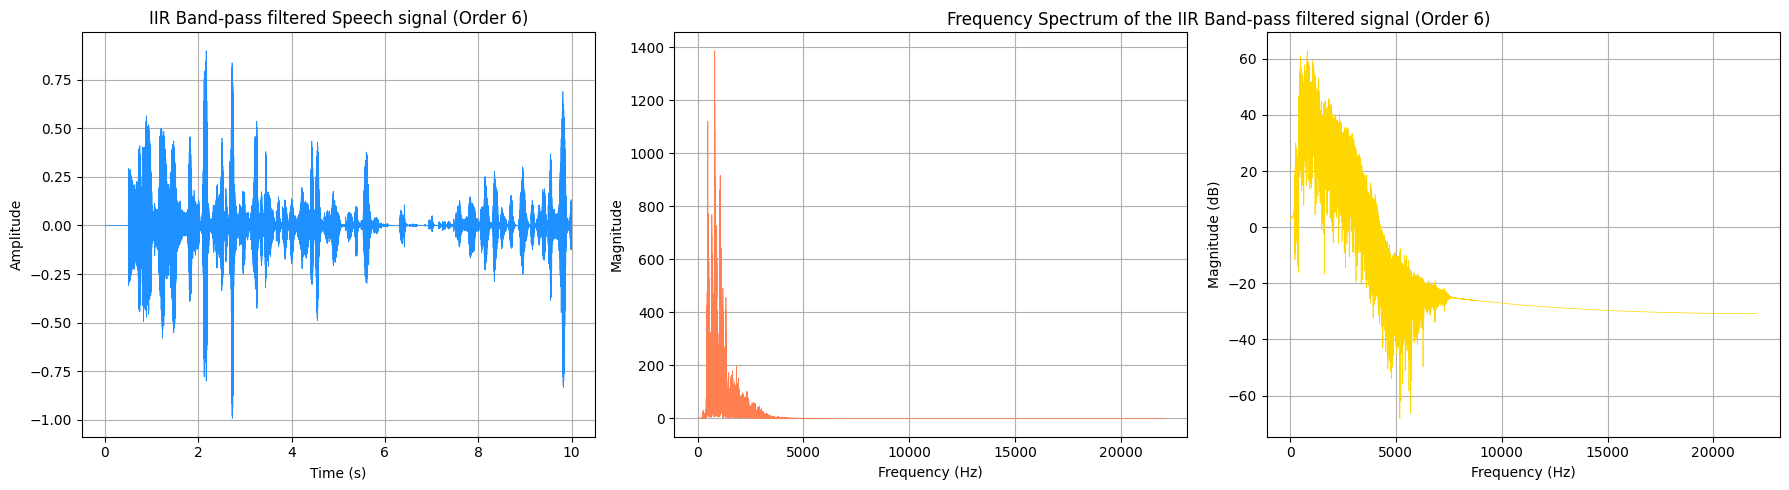

In [163]:
#IIR Band-pass filtered speech signal
band_magnitude_avg = []

for order in order_values:
    band_filtered_speech = IIR_bandpass_filter(speech_signal, low_cutoff, high_cutoff, fs, order)
    
    #Duration
    duration_band_speech = len(band_filtered_speech) / fs

    #Spectrum
    spectrum_band = fft(band_filtered_speech)

    #Frequencies of the FFT
    freq_FFT_band = fftfreq(len(band_filtered_speech), 1/fs)
    freq_FFT_band = freq_FFT_band[: len(band_filtered_speech)//2]

    #Magnitude
    magnitude_band = np.abs(spectrum_band[: len(band_filtered_speech) // 2])
    #Average magnitude
    b_m_avg = np.mean(magnitude_band)
    band_magnitude_avg.append(b_m_avg)
    
    #Transforming the magnitude in decibel
    magnitude_band_dB = 20*np.log10(magnitude_band)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_band_speech, len(band_filtered_speech)), band_filtered_speech, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"IIR Band-pass filtered Speech signal (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_band, magnitude_band, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_band, magnitude_band_dB, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)

    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the IIR Band-pass filtered signal (Order {order})", ha='center', fontsize=12, color="black")
    
    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show()

In [81]:
#Other calculations for the final interpretation and analysis
#Smoothness through Standard Variation
smoothness_low = []
smoothness_high = []
smoothness_band = []

for order in order_values:
    low_filtered_speech = IIR_lowpass_filter(speech_signal, high_cutoff, fs, order)
    s_low = np.std(np.diff(low_filtered_speech))
    smoothness_low.append(s_low)

    high_filtered_speech = IIR_highpass_filter(speech_signal, low_cutoff, fs, order)
    s_high = np.std(np.diff(high_filtered_speech))
    smoothness_high.append(s_high)

    band_filtered_speech = IIR_bandpass_filter(speech_signal, low_cutoff, high_cutoff, fs, order)
    s_band = np.std(np.diff(band_filtered_speech))
    smoothness_band.append(s_band)

#PER ME: Per analizzare la smoothness nel dominio del tempo, puoi calcolare la variazione standard o la media delle differenze tra campioni adiacenti del segnale.
#Valori più bassi indicano una transizione più graduale nel segnale filtrato, mentre valori alti possono indicare “ondeggiamenti” introdotti da filtri di ordine alto. 
#Questo può fornire una misura aggiuntiva alla tua osservazione visiva.

res_smoothness = {
    "Order": order_values,
    "Low-pass": [round(s, 4) for s in smoothness_low],
    "High-pass": [round(s, 4) for s in smoothness_high],
    "Band-pass": [round(s, 4) for s in smoothness_band]
}

res_smoothness_df = pd.DataFrame(res_smoothness)
res_smoothness_df

Order  Low-pass  High-pass  Band-pass
0      2    0.0121     0.0117     0.0112
1      4    0.0122     0.0119     0.0112
2      6    0.0122     0.0120     0.0112

In [82]:
#Visualizing the magnitude averages
res_magnitude = {
    "Order": order_values,
    "Low-pass": [round(s, 4) for s in low_magnitude_avg],
    "High-pass": [round(s, 4) for s in high_magnitude_avg],
    "Band-pass": [round(s, 4) for s in band_magnitude_avg]
}

res_magnitude_df = pd.DataFrame(res_magnitude)
res_magnitude_df

Order  Low-pass  High-pass  Band-pass
0      2   17.4776    14.2266    13.0401
1      4   17.4439    13.6328    12.1620
2      6   17.4142    13.3484    11.8064

### 3. Part 3: FIR vs. IIR Filters
- Apply FIR Filters:
  - Reuse the FIR filters designed in the previous FIR assignment (or refer to the steps outlined in the "FIR Filter Design" section of this assignment). Apply the same FIR filters (low-pass, high-pass, band-pass) with filter orders 20, 50, and 100 to the voice signal.
  - Plot and compare the time-domain and frequency-domain results of FIR filters with the IIR filters designed in Part 2.

- Compare FIR and IIR Filters:
  - Compare the frequency response plots of FIR and IIR filters.
  - Discuss the differences in how FIR and IIR filters handle the voice signal, specifically in terms of delay, ripple in the passband/stopband, and the sharpness of the transition band.
  - Analyze which filter (FIR or IIR) performs better in maintaining the quality of the original voice signal.

In [83]:
#Creation of the FIR filters
#FIR Low-pass filter
def FIR_lowpass_filter(data, highcut, fs, order):
    coefficients = firwin(order + 1, highcut / (0.5 * fs), pass_zero=True)
    y = lfilter(coefficients, 1.0, data)
    return y

#FIR High-pass filter
def FIR_highpass_filter(data, lowcut, fs, order):
    coefficients = firwin(order + 1, lowcut / (0.5 * fs), pass_zero=True)
    y = lfilter(coefficients, 1.0, data)
    return y

#FIR Band-pass filter
def FIR_bandpass_filter(data, lowcut, highcut, fs, order):
    coefficients = firwin(order + 1, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], pass_zero=False)
    y = lfilter(coefficients, 1.0, data)
    return y

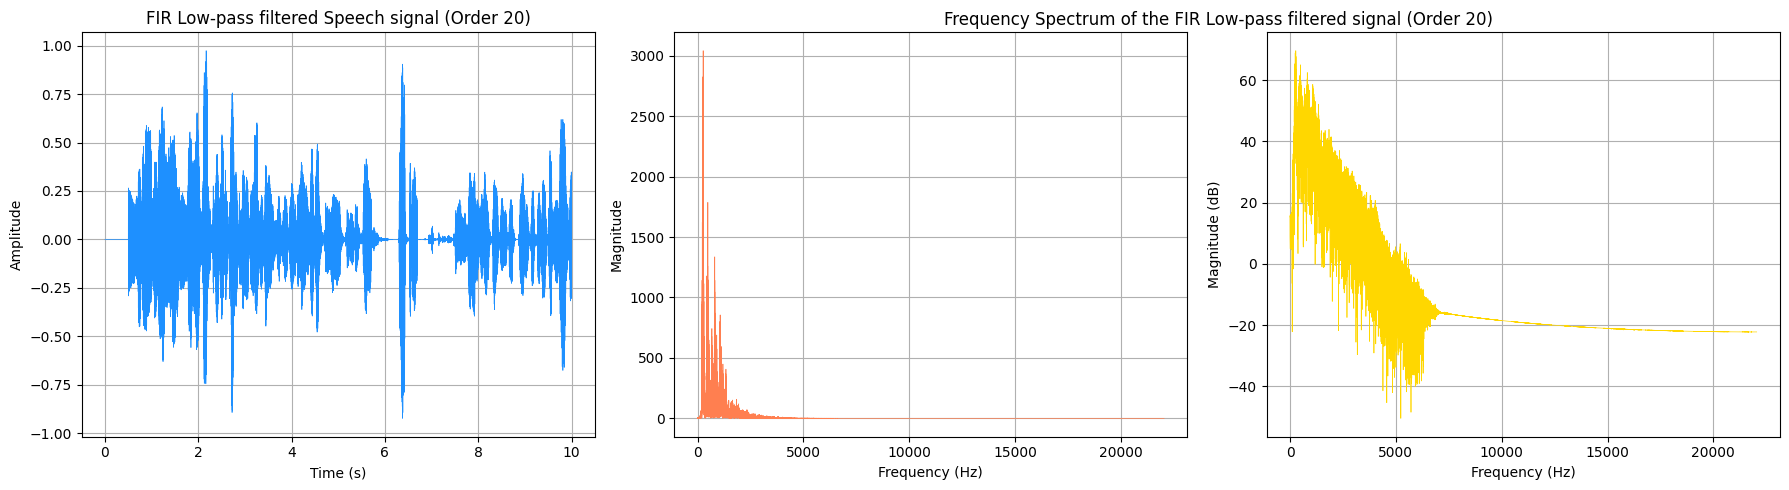

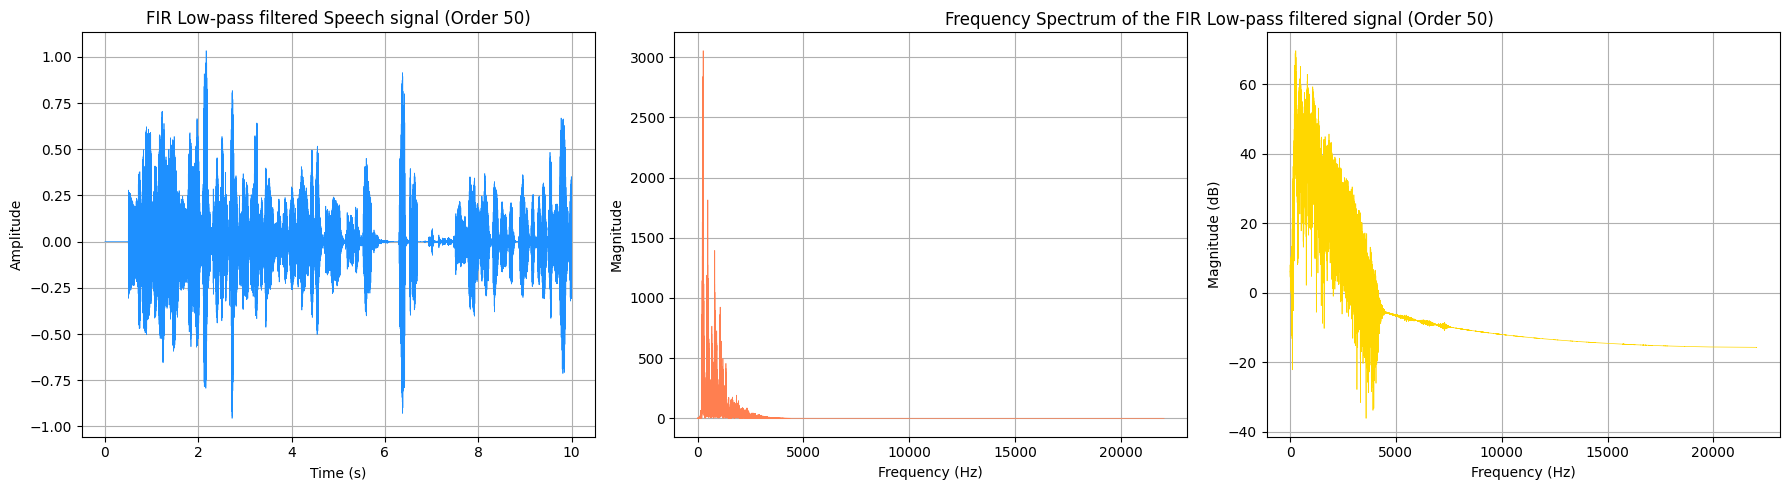

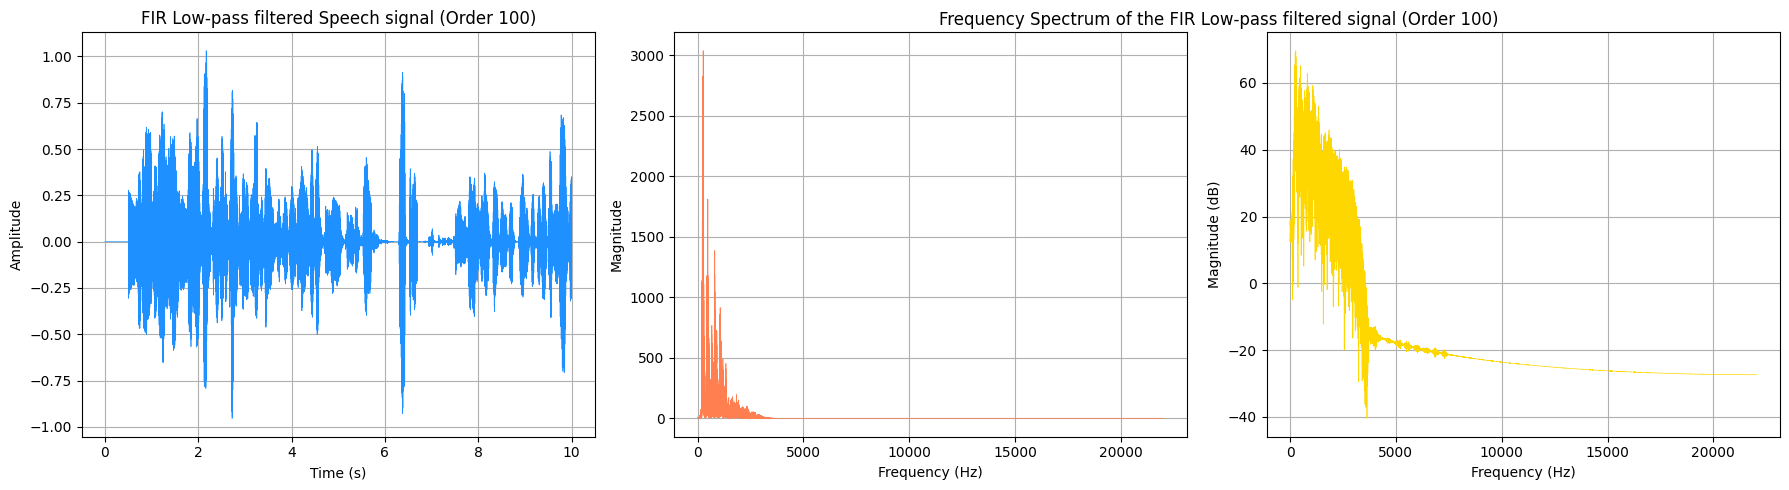

In [84]:
order_values2 = [20, 50, 100]

#FIR Low-pass filtered speech signal
for order in order_values2:
    low_filtered_FIR = FIR_lowpass_filter(speech_signal, high_cutoff, fs, order)
    
    #Duration
    duration_low_FIR = len(low_filtered_FIR) / fs

    #Spectrum
    spectrum_low_FIR = fft(low_filtered_FIR)

    #Frequencies of the FFT
    freq_FFT_low_FIR = fftfreq(len(low_filtered_FIR), 1/fs)
    freq_FFT_low_FIR = freq_FFT_low_FIR[: len(low_filtered_FIR)//2]

    #Magnitude
    magnitude_low_FIR = np.abs(spectrum_low_FIR[: len(low_filtered_FIR) // 2])

    #Transforming the magnitude in decibel
    magnitude_low_dB_FIR = 20*np.log10(magnitude_low_FIR)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_low_FIR, len(low_filtered_FIR)), low_filtered_FIR, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"FIR Low-pass filtered Speech signal (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_low_FIR, magnitude_low_FIR, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_low_FIR, magnitude_low_dB_FIR, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)

    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the FIR Low-pass filtered signal (Order {order})", ha='center', fontsize=12, color="black")
    
    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show() 

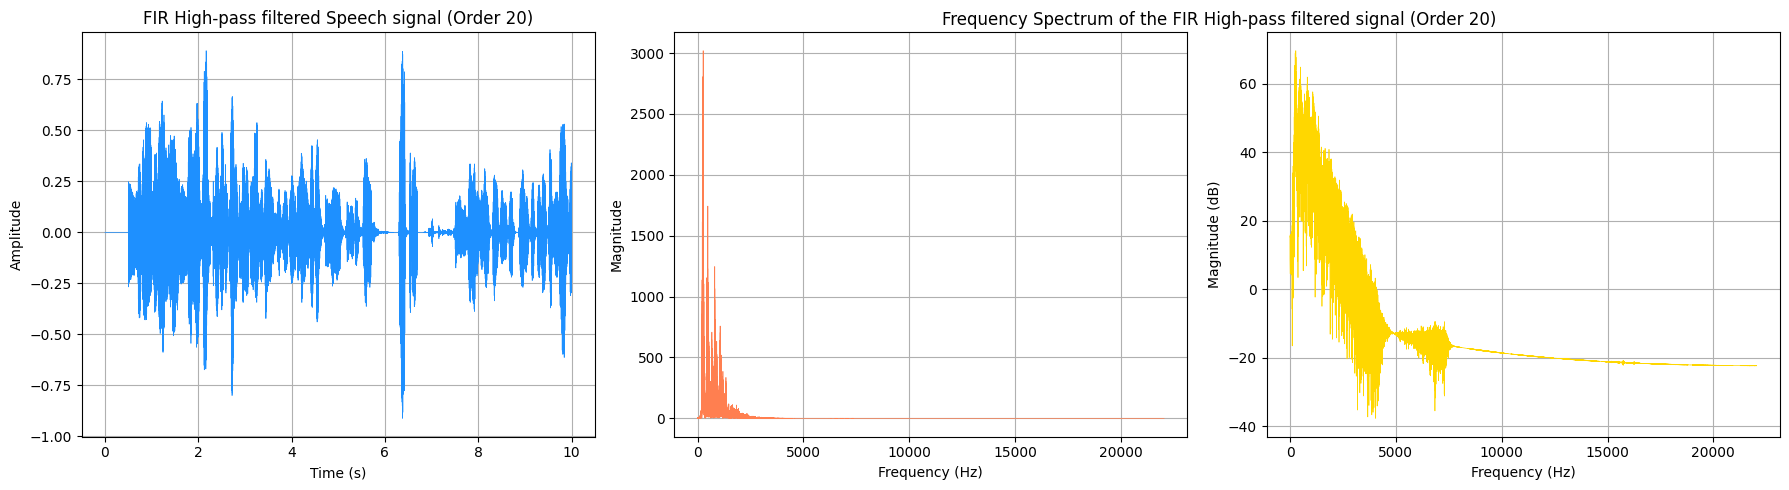

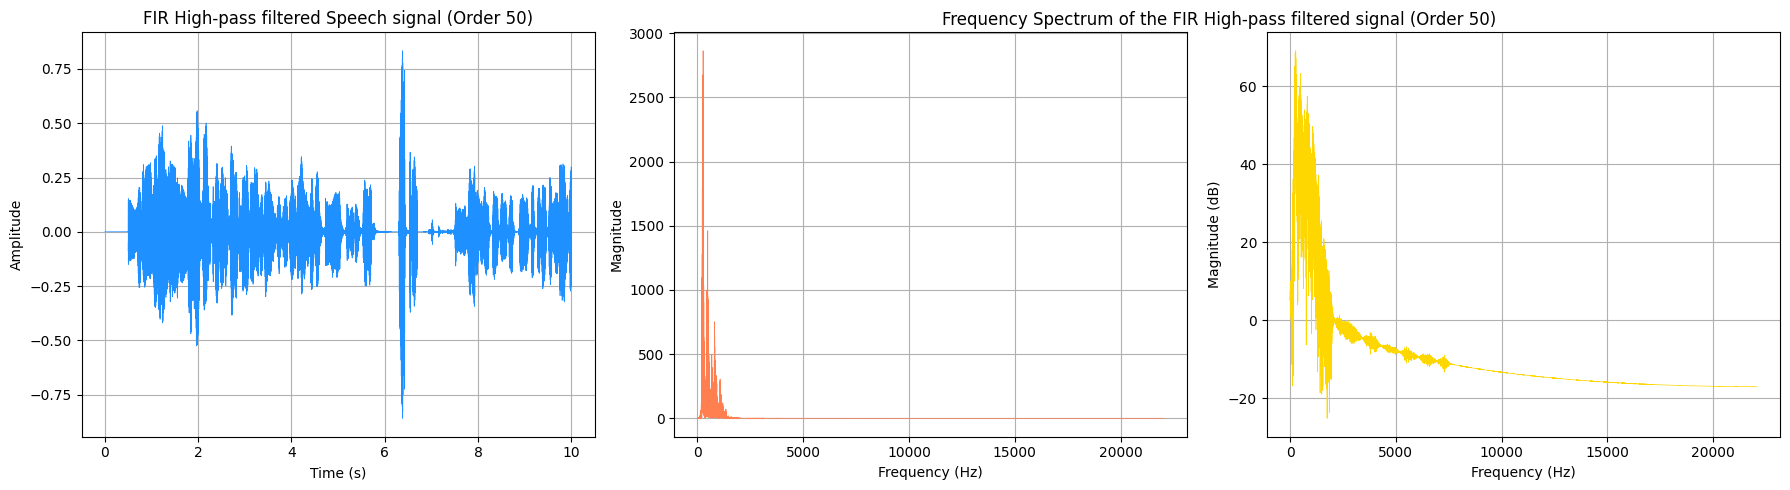

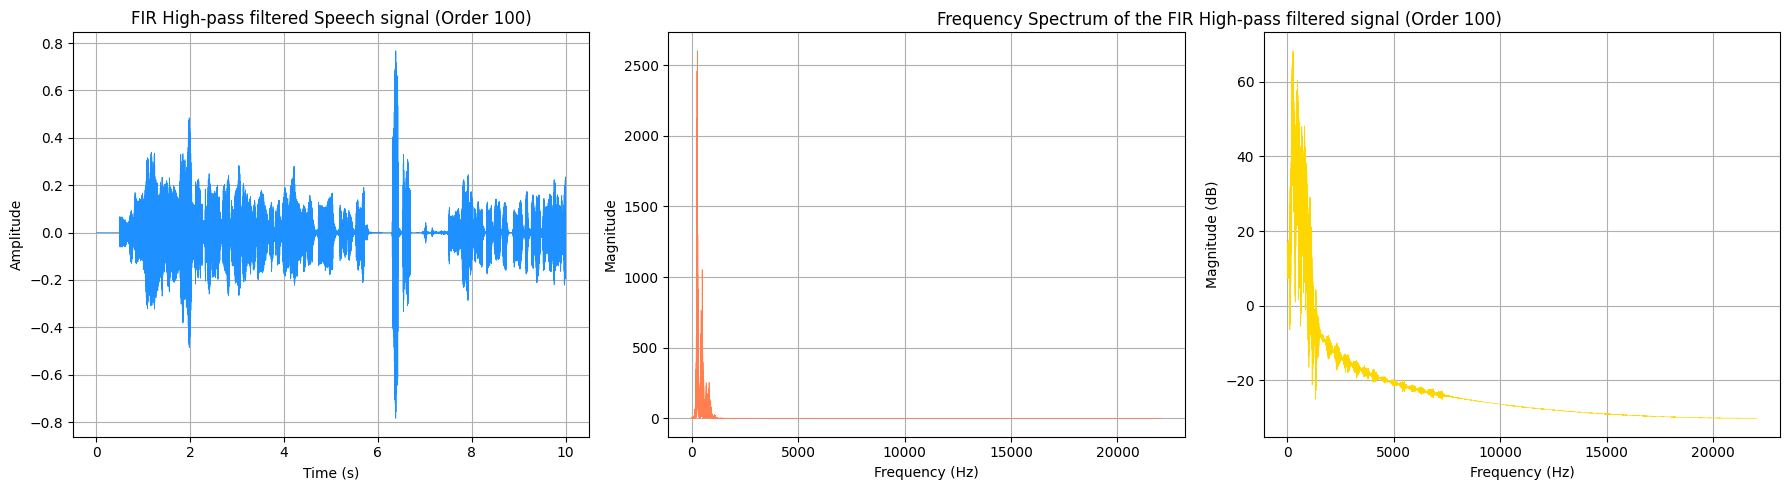

In [85]:
#FIR High-pass filtered speech signal
for order in order_values2:
    high_filtered_FIR = FIR_highpass_filter(speech_signal, low_cutoff, fs, order)
    
    #Duration
    duration_high_FIR = len(high_filtered_FIR) / fs

    #Spectrum
    spectrum_high_FIR = fft(high_filtered_FIR)

    #Frequencies of the FFT
    freq_FFT_high_FIR = fftfreq(len(high_filtered_FIR), 1/fs)
    freq_FFT_high_FIR = freq_FFT_high_FIR[: len(high_filtered_FIR)//2]

    #Magnitude
    magnitude_high_FIR = np.abs(spectrum_high_FIR[: len(high_filtered_FIR) // 2])

    #Transforming the magnitude in decibel
    magnitude_high_dB_FIR = 20*np.log10(magnitude_high_FIR)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_high_FIR, len(high_filtered_FIR)), high_filtered_FIR, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"FIR High-pass filtered Speech signal (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_high_FIR, magnitude_high_FIR, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_high_FIR, magnitude_high_dB_FIR, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)

    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the FIR High-pass filtered signal (Order {order})", ha='center', fontsize=12, color="black")
    
    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show() 

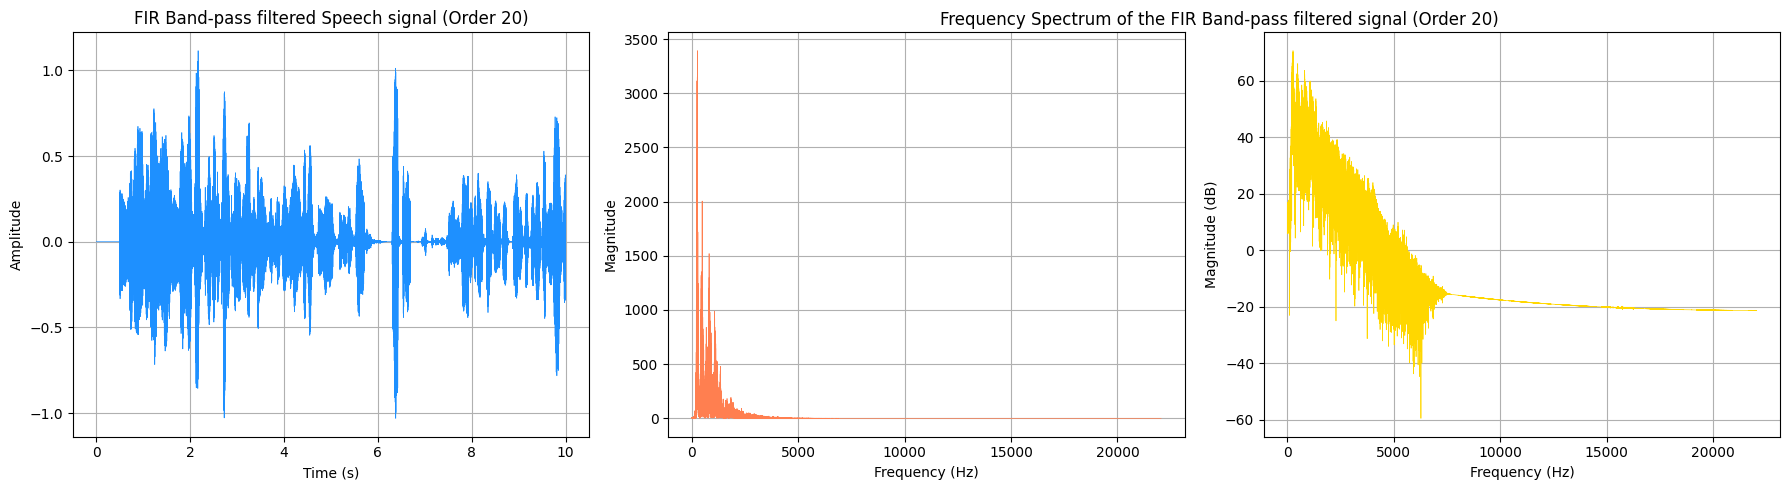

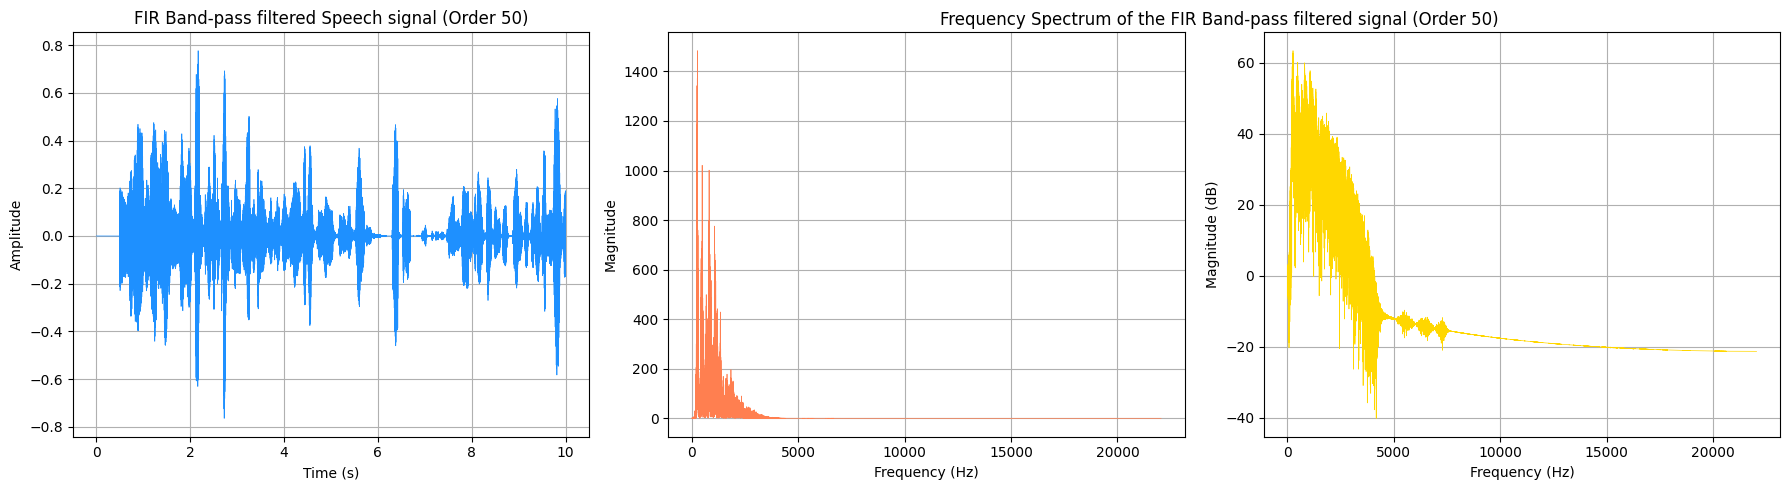

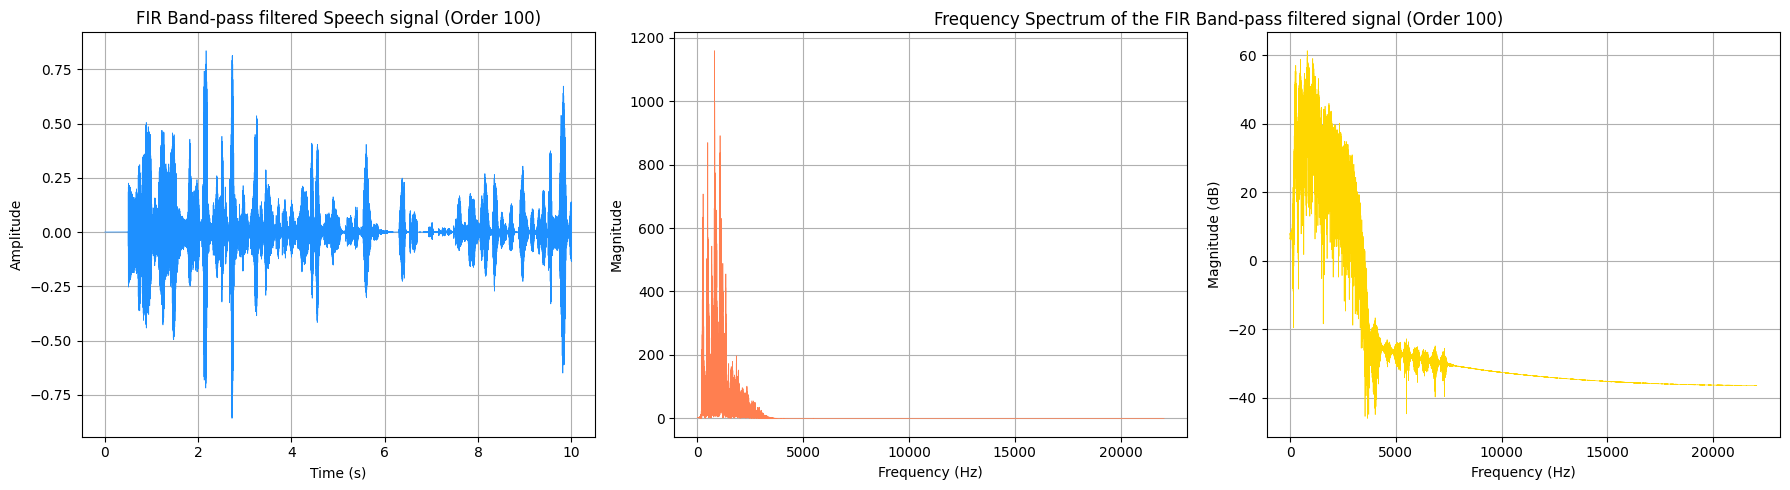

In [86]:
#FIR Band-pass filtered speech signal
for order in order_values2:
    band_filtered_FIR = FIR_bandpass_filter(speech_signal, low_cutoff, high_cutoff, fs, order)
    
    #Duration
    duration_band_FIR = len(band_filtered_FIR) / fs

    #Spectrum
    spectrum_band_FIR = fft(band_filtered_FIR)

    #Frequencies of the FFT
    freq_FFT_band_FIR = fftfreq(len(band_filtered_FIR), 1/fs)
    freq_FFT_band_FIR = freq_FFT_band_FIR[: len(band_filtered_FIR)//2]

    #Magnitude
    magnitude_band_FIR = np.abs(spectrum_band_FIR[: len(band_filtered_FIR) // 2])
    
    #Transforming the magnitude in decibel
    magnitude_band_dB_FIR = 20*np.log10(magnitude_band_FIR)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_band_FIR, len(band_filtered_FIR)), band_filtered_FIR, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"FIR Band-pass filtered Speech signal (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_band_FIR, magnitude_band_FIR, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_band_FIR, magnitude_band_dB_FIR, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)

    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the FIR Band-pass filtered signal (Order {order})", ha='center', fontsize=12, color="black")
    
    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show() 

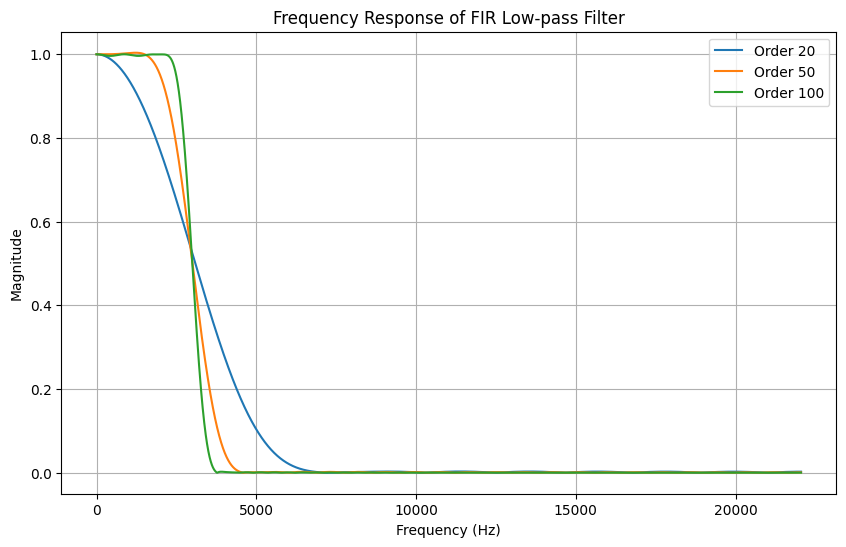

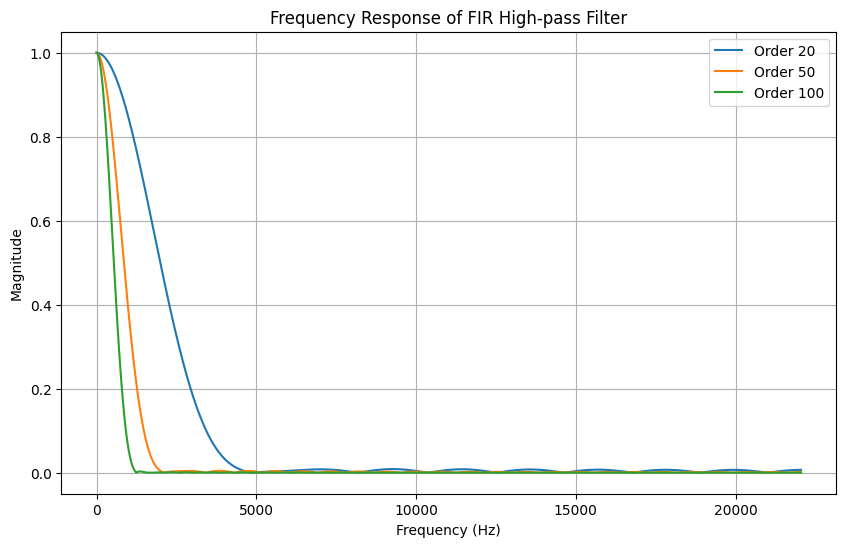

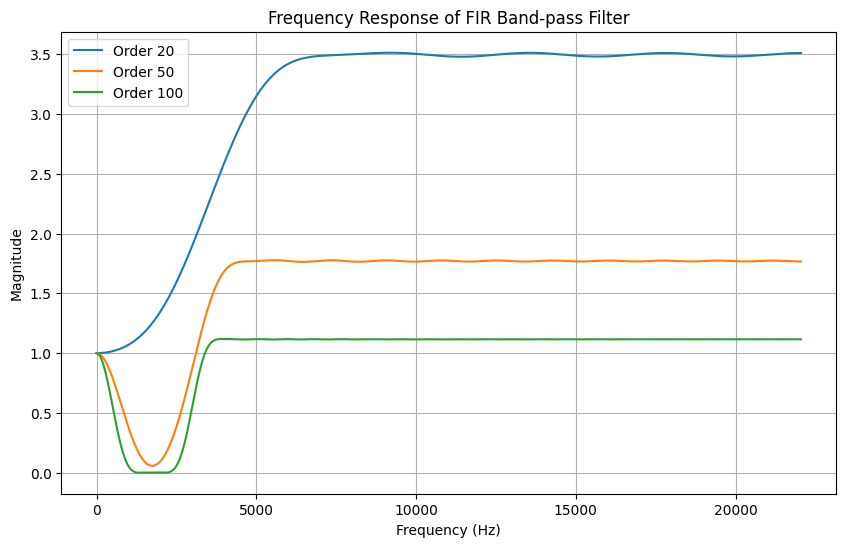

In [165]:
#Visualization of frequency response of the FIR filters: we can use the butterworth functions.
for filter_type in ['low', 'high', 'band']:
    plt.figure(figsize=(10, 6))
    for order in order_values2:
        if filter_type == 'low':
            coefficients = firwin(order + 1, high_cutoff / (0.5 * fs), pass_zero=True)
        elif filter_type == 'high':
            coefficients = firwin(order + 1, low_cutoff / (0.5 * fs), pass_zero=True)
        elif filter_type == 'band':
            coefficients = firwin(order + 1, [low_cutoff / (0.5 * fs), high_cutoff / (0.5 * fs)], pass_zero=True)
        
        #Frequency response based on filter type
        w, h = freqz(coefficients, worN=8000)
        
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label=f"Order {order}")
        #w is converted into Heartz from radiants, while abs(h) takes just the aplitude part of the magnitude.
    
    plt.title(f"Frequency Response of FIR {filter_type.capitalize()}-pass Filter")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.legend()
    plt.show()

C:\Users\sofyc\AppData\Local\Temp\ipykernel_60412\3154298380.py:11: UserWarning: The filter's denominator is extremely small at frequencies [0.000],             around which a singularity may be present
  w_iir_high, gd_iir_high = group_delay((b_high, a_high)) #Delay
C:\Users\sofyc\AppData\Local\Temp\ipykernel_60412\3154298380.py:15: UserWarning: The filter's denominator is extremely small at frequencies [0.000],             around which a singularity may be present
  w_iir_band, gd_iir_band = group_delay((b_band, a_band)) #Delay
C:\Users\sofyc\AppData\Local\Temp\ipykernel_60412\3154298380.py:15: UserWarning: The filter's denominator is extremely small at frequencies [0.000, 0.006, 0.012, 0.018, 0.025],             around which a singularity may be present
  w_iir_band, gd_iir_band = group_delay((b_band, a_band)) #Delay
C:\Users\sofyc\AppData\Local\Temp\ipykernel_60412\3154298380.py:7: UserWarning: The filter's denominator is extremely small at frequencies [3.135],             around w

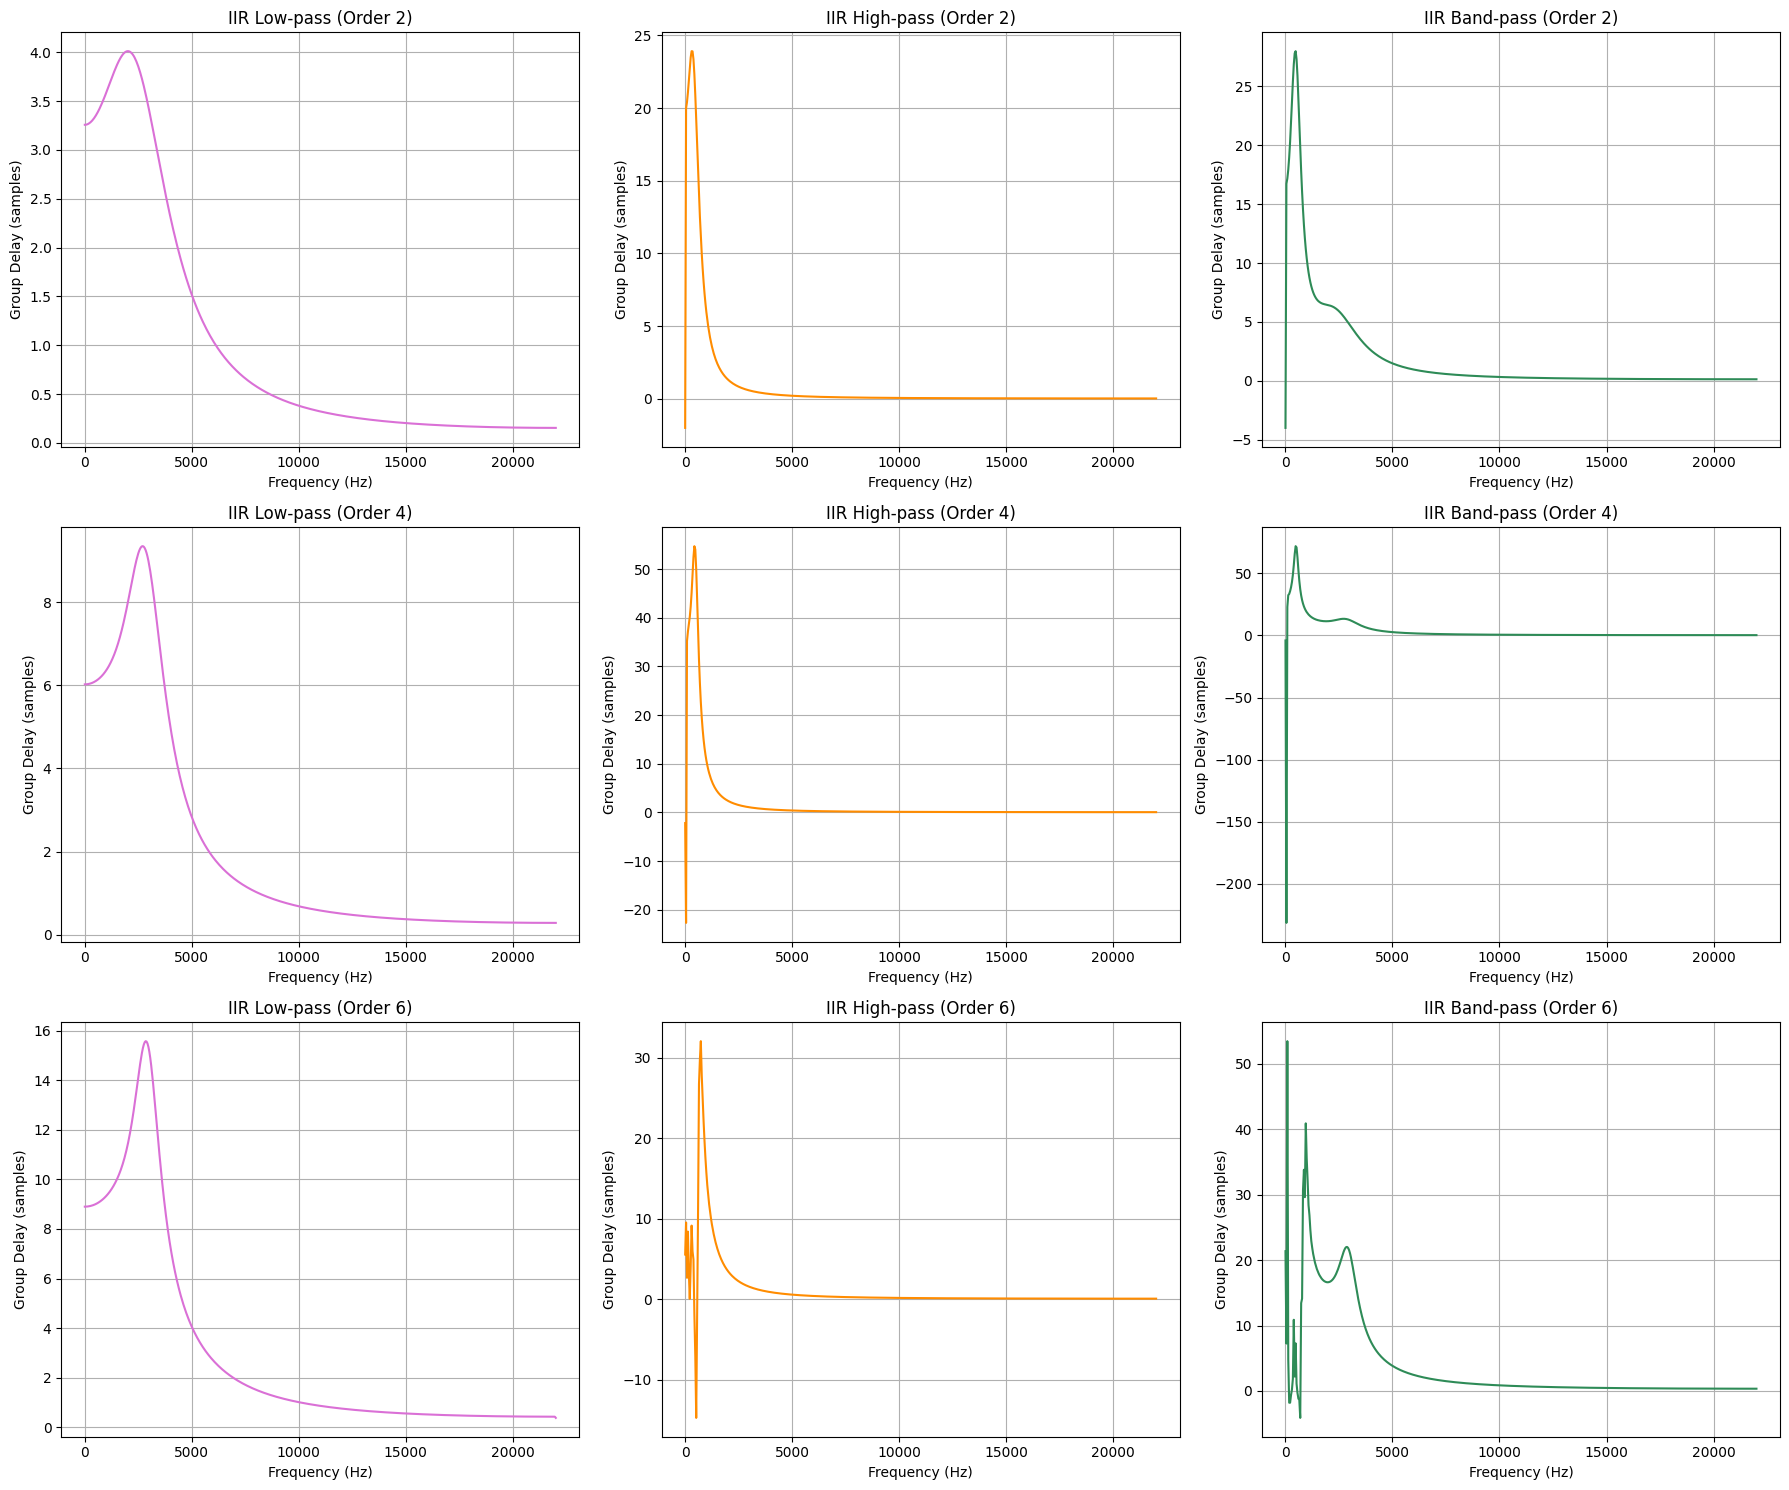

In [88]:
#DELAY IIR
fig, axs = plt.subplots(len(order_values), 3, figsize=(18, 5 * len(order_values)))

for i, order in enumerate(order_values):
    #Coefficients IIR Low-pass filter
    b_low, a_low = lowpass_butterworth(high_cutoff, fs, order=order)
    w_iir_low, gd_iir_low = group_delay((b_low, a_low)) #Delay

    #Coefficients IIR High-pass filter
    b_high, a_high = highpass_butterworth(low_cutoff, fs, order=order)
    w_iir_high, gd_iir_high = group_delay((b_high, a_high)) #Delay

    #Coefficients IIR Band-pass filter
    b_band, a_band = bandpass_butterworth(low_cutoff, high_cutoff, fs, order=order)
    w_iir_band, gd_iir_band = group_delay((b_band, a_band)) #Delay

    #Plot IIR Low-pass filter
    axs[i, 0].plot(w_iir_low * fs / (2 * np.pi), gd_iir_low, color="orchid")
    axs[i, 0].set_title(f"IIR Low-pass (Order {order})")
    axs[i, 0].set_xlabel("Frequency (Hz)")
    axs[i, 0].set_ylabel("Group Delay (samples)")
    axs[i, 0].grid(True)

    #Plot IIR High-pass filter
    axs[i, 1].plot(w_iir_high * fs / (2 * np.pi), gd_iir_high, color="darkorange")
    axs[i, 1].set_title(f"IIR High-pass (Order {order})")
    axs[i, 1].set_xlabel("Frequency (Hz)")
    axs[i, 1].set_ylabel("Group Delay (samples)")
    axs[i, 1].grid(True)

    #Plot IIR Band-pass filter
    axs[i, 2].plot(w_iir_band * fs / (2 * np.pi), gd_iir_band, color="seagreen")
    axs[i, 2].set_title(f"IIR Band-pass (Order {order})")
    axs[i, 2].set_xlabel("Frequency (Hz)")
    axs[i, 2].set_ylabel("Group Delay (samples)")
    axs[i, 2].grid(True)

#Space between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

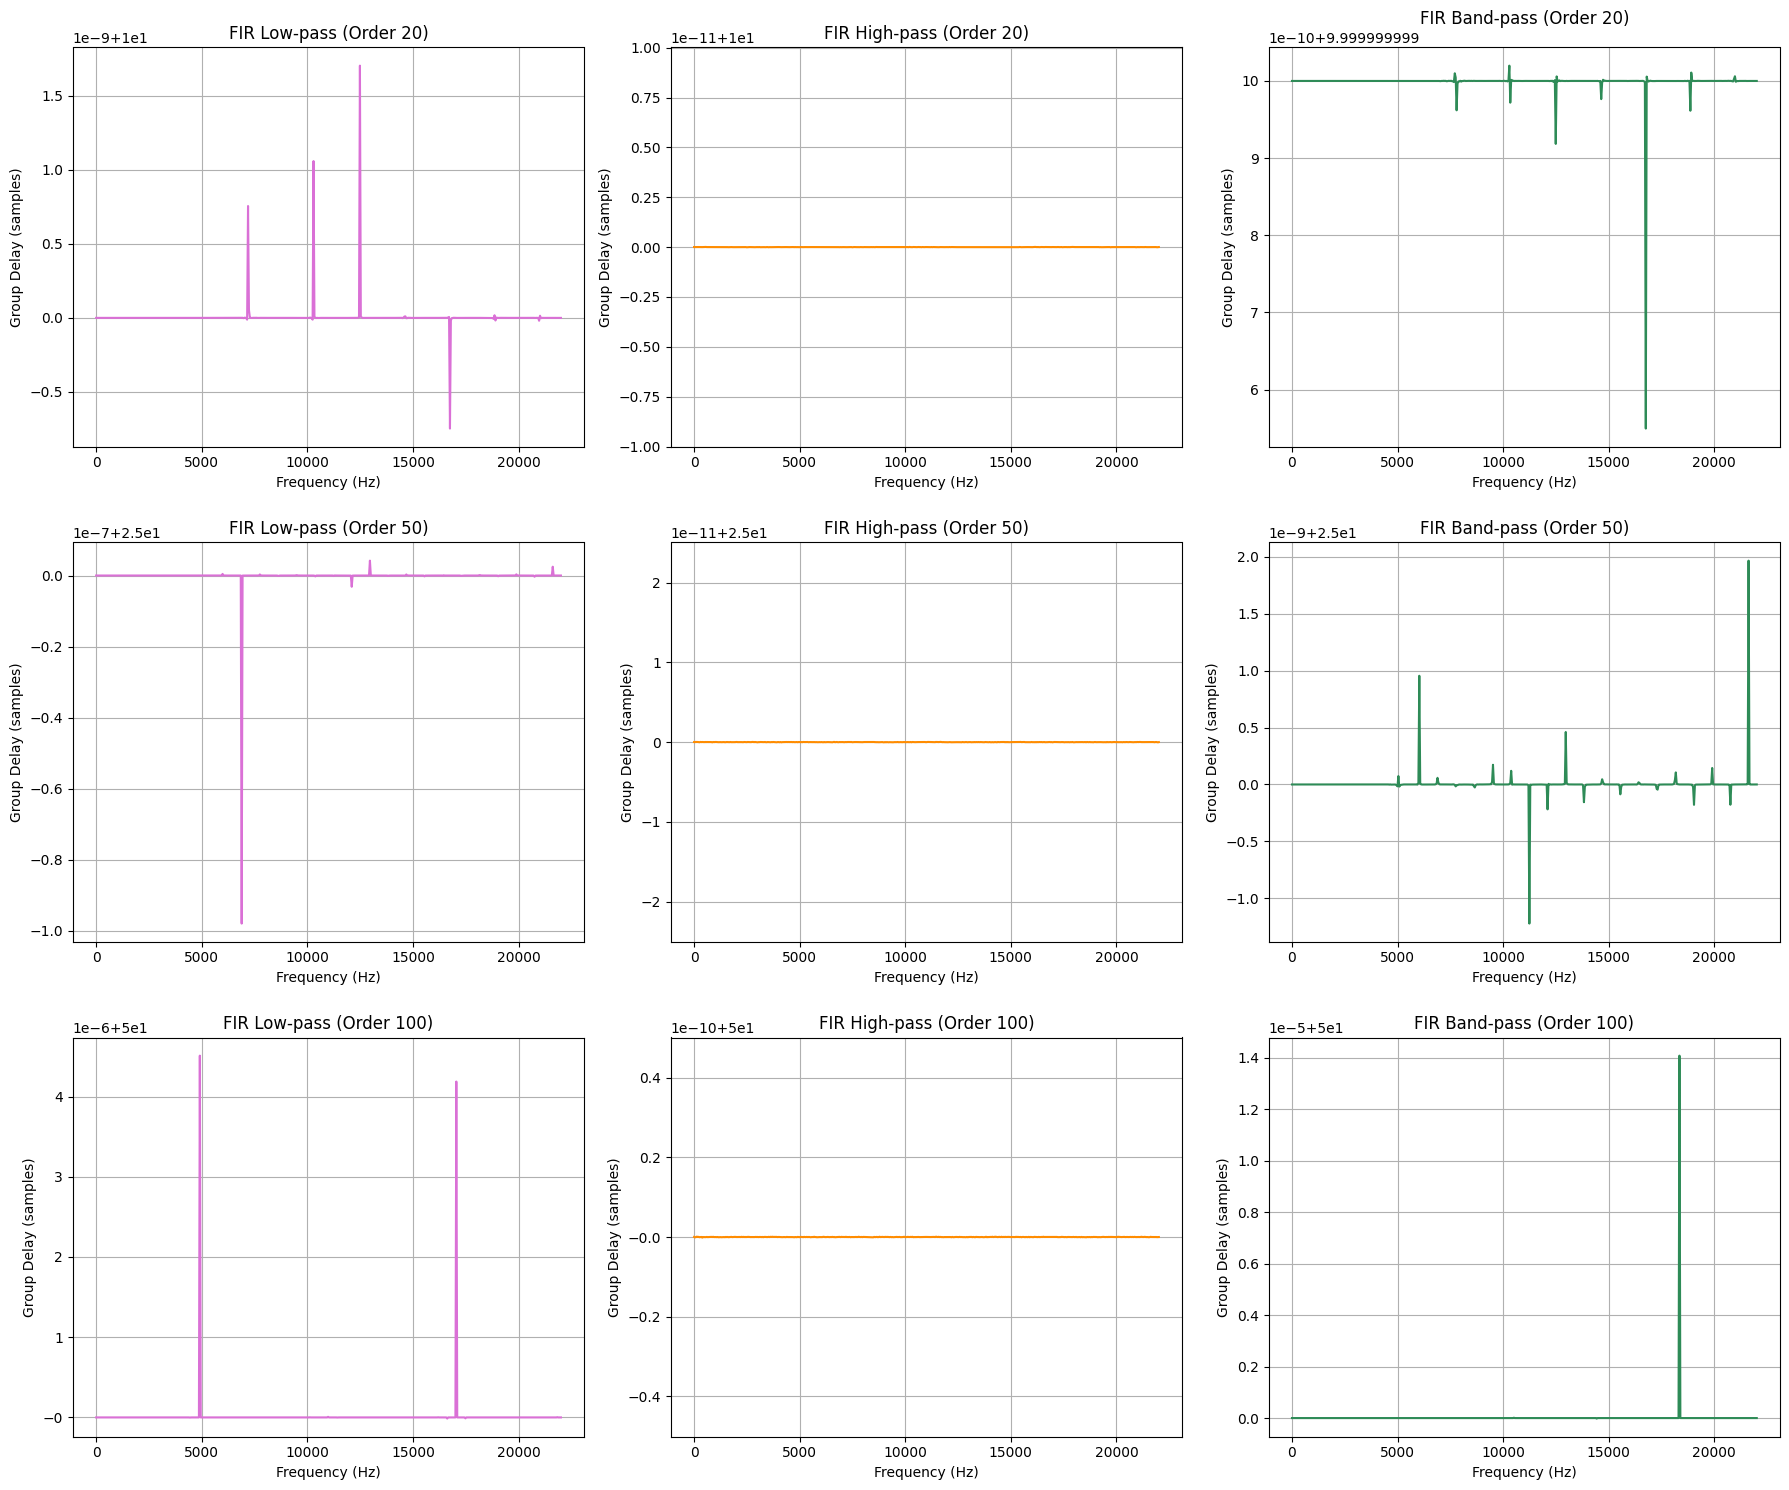

In [89]:
#DELAY FIR
fig, axs = plt.subplots(len(order_values2), 3, figsize=(18, 5 * len(order_values2)))

for i, order in enumerate(order_values2):
    #Coefficients FIR Low-pass filter
    coefficients_low = firwin(order + 1, high_cutoff / (0.5 * fs), pass_zero=True)
    w_fir_low, gd_fir_low = group_delay((coefficients_low, 1)) #Delay

    #Coefficients FIR High-pass filter
    coefficients_high = firwin(order + 1, low_cutoff / (0.5 * fs), pass_zero=False)
    w_fir_high, gd_fir_high = group_delay((coefficients_high, 1)) #Delay

    #Coefficients FIR Band-pass filter
    coefficients_band = firwin(order + 1, [low_cutoff / (0.5 * fs), high_cutoff / (0.5 * fs)], pass_zero=False)
    w_fir_band, gd_fir_band = group_delay((coefficients_band, 1)) #Delay

    #Plot FIR Low-pass filter
    axs[i, 0].plot(w_fir_low * fs / (2 * np.pi), gd_fir_low, color="orchid")
    axs[i, 0].set_title(f"FIR Low-pass (Order {order})")
    axs[i, 0].set_xlabel("Frequency (Hz)")
    axs[i, 0].set_ylabel("Group Delay (samples)")
    axs[i, 0].grid(True)

    #Plot FIR High-pass filter
    axs[i, 1].plot(w_fir_high * fs / (2 * np.pi), gd_fir_high, color="darkorange")
    axs[i, 1].set_title(f"FIR High-pass (Order {order})")
    axs[i, 1].set_xlabel("Frequency (Hz)")
    axs[i, 1].set_ylabel("Group Delay (samples)")
    axs[i, 1].grid(True)

    #Plot FIR Band-pass filter
    axs[i, 2].plot(w_fir_band * fs / (2 * np.pi), gd_fir_band, color="seagreen")
    axs[i, 2].set_title(f"FIR Band-pass (Order {order})")
    axs[i, 2].set_xlabel("Frequency (Hz)")
    axs[i, 2].set_ylabel("Group Delay (samples)")
    axs[i, 2].grid(True)

#Space between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

- For the Passband response we filter using the frequencies lower or higher than the cutoff. Since the cutoff is in Hz, we need to transform it in rad/s in this way:

$\text{cutoff in rad/s} = \text{cutoff Hz} \cdot \frac{2 \pi}{fs}$

``abs(h_iir_low)`` is the abs of the frequency response, i.e. $|H(e^{jw})|$, that is the magnitude or the amplitude of the frequency response.

- For the Passband ripple:

$\text{Passband Ripple} = 20 \cdot log_{10}\frac{\text{maximum value in the band}}{\text{minimum value in the band}}$

- For the Stopband ripple:

$\text{Stopband Ripple} = 20 \cdot log_{10}(max(\text{stopband response}))$

In [144]:
#RIPPLE IIR
iir_pass_low = []
iir_pass_high = []
iir_pass_band = []

iir_stop_low = []
iir_stop_high = []
iir_stop_band = []

iir_sharp_low = []
iir_sharp_high = []
iir_sharp_band = []

for i, order in enumerate(order_values):
    
    #1) Coefficients IIR Low-pass filter
    b_low, a_low = lowpass_butterworth(high_cutoff, fs, order=order)
    w_iir_low, h_iir_low = freqz(b_low, a_low, worN=8000) #Ripple
    #Passband ripple calculation: Max. deviation of the response in the band
    iir_passband_resp_low =  abs(h_iir_low[w_iir_low <= high_cutoff * 2 * np.pi / fs]) #Response in the band
    iir_passband_ripple_low = 20 * np.log10(np.max(iir_passband_resp_low)) - 20 * np.log10(np.min(iir_passband_resp_low))
    iir_pass_low.append(iir_passband_ripple_low)     

    #Stopband ripple calculation: max. value of the response in the stop band in dB
    iir_stopband_resp_low = abs(h_iir_low[w_iir_low > high_cutoff * 2 * np.pi / fs])
    iir_stopband_ripple_low = 20 * np.log10(np.max(iir_stopband_resp_low))
    iir_stop_low.append(iir_stopband_ripple_low)

    #Sharpness of the transition band
    freq_Hz_iir_low = fs * 0.5 * w_iir_low / np.pi #Frequencies in Hz
    magn_dB_iir_low = 20 * np.log10(np.abs(h_iir_low)) #Magnitude in decibel
    #Cutoff frequency interval for the regression
    cutoff_index = np.where(freq_Hz_iir_low >= high_cutoff)[0][0]  #Finding the first index that exceeds the cutoff
    transition_indices = np.arange(cutoff_index - 20, cutoff_index + 20)  #Selecting some points around the cutoff frequency to construct the linear regression
    #Linear regression
    slope_low, intercept_low, r_value, p_value, std_err = linregress(freq_Hz_iir_low[transition_indices], magn_dB_iir_low[transition_indices])
    iir_sharp_low.append(slope_low)

    #2) Coefficients IIR High-pass filter
    b_high, a_high = highpass_butterworth(low_cutoff, fs, order=order)
    w_iir_high, h_iir_high = freqz(b_high, a_high, worN=8000) #Ripple
    #Passband ripple calculation: Max. deviation of the response in the band
    iir_passband_resp_high =  abs(h_iir_high[w_iir_high >= low_cutoff * 2 * np.pi / fs]) #Response in the band
    iir_passband_ripple_high = 20 * np.log10(np.max(iir_passband_resp_high)) - 20 * np.log10(np.min(iir_passband_resp_high))
    iir_pass_high.append(iir_passband_ripple_high)

    #Stopband ripple calculation: max. value of the response in the stop band in dB
    iir_stopband_resp_high = abs(h_iir_high[w_iir_high < low_cutoff * 2 * np.pi / fs])
    iir_stopband_ripple_high = 20 * np.log10(np.max(iir_stopband_resp_high))
    iir_stop_high.append(iir_stopband_ripple_high)

    #Sharpness of the transition band
    freq_Hz_iir_high = fs * 0.5 * w_iir_high / np.pi #Frequencies in Hz
    magn_dB_iir_high = 20 * np.log10(np.abs(h_iir_high)) #Magnitude in decibel
    #Cutoff frequency interval for the regression
    cutoff_index = np.where(freq_Hz_iir_high <= low_cutoff)[0][-1]  #Finding the first index that exceeds the cutoff
    transition_indices = np.arange(cutoff_index - 20, cutoff_index + 20)  #Selecting some points around the cutoff frequency to construct the linear regression
    #Linear regression
    slope_high, intercept_high, r_value, p_value, std_err = linregress(freq_Hz_iir_high[transition_indices], magn_dB_iir_high[transition_indices])
    iir_sharp_high.append(slope_high)

    #3) Coefficients IIR Band-pass filter
    b_band, a_band = bandpass_butterworth(low_cutoff, high_cutoff, fs, order=order)
    w_iir_band, h_iir_band = freqz(b_band, a_band, worN=8000) #Ripple
    #Passband ripple calculation: Max. deviation of the response in the band
    iir_passband_resp_band = abs(h_iir_band[(w_iir_band >= low_cutoff * 2 * np.pi / fs) & (w_iir_band <= high_cutoff * 2 * np.pi / fs)])
    iir_passband_ripple_band = 20 * np.log10(np.max(iir_passband_resp_band)) - 20 * np.log10(np.min(iir_passband_resp_band))
    iir_pass_band.append(iir_passband_ripple_band)

    #Stopband ripple calculation: max response in stopbands (below low_cutoff and above high_cutoff)
    iir_stopband_resp_band = np.concatenate([
        abs(h_iir_band[w_iir_band < low_cutoff * 2 * np.pi / fs]), 
        abs(h_iir_band[w_iir_band > high_cutoff * 2 * np.pi / fs])
    ])
    iir_stopband_ripple_band = 20 * np.log10(np.max(iir_stopband_resp_band))
    iir_stop_band.append(iir_stopband_ripple_band)

    #Sharpness of the transition band
    freq_Hz_iir_band = fs * 0.5 * w_iir_band / np.pi #Frequencies in Hz
    magn_dB_iir_band = 20 * np.log10(np.abs(h_iir_band)) #Magnitude in decibel
    #Cutoff frequency interval for the regression
    low_cutoff_index = np.where(freq_Hz_iir_band >= low_cutoff)[0][0] #Finding the indeces that exceed the cutoff
    high_cutoff_index = np.where(freq_Hz_iir_band <= high_cutoff)[0][-1] 
    transition_indices = np.arange(low_cutoff_index, high_cutoff_index + 1)  #Selecting some points around the cutoff frequency to construct the linear regression
    #Linear regression
    slope_band, intercept_band, r_value, p_value, std_err = linregress(freq_Hz_iir_band[transition_indices], magn_dB_iir_band[transition_indices])
    iir_sharp_band.append(slope_band)

C:\Users\sofyc\AppData\Local\Temp\ipykernel_60412\2120118222.py:55: RuntimeWarning: divide by zero encountered in log10
  magn_dB_iir_high = 20 * np.log10(np.abs(h_iir_high)) #Magnitude in decibel
C:\Users\sofyc\AppData\Local\Temp\ipykernel_60412\2120118222.py:82: RuntimeWarning: divide by zero encountered in log10
  magn_dB_iir_band = 20 * np.log10(np.abs(h_iir_band)) #Magnitude in decibel


In [150]:
#RIPPLE FIR
fir_pass_low = []
fir_pass_high = []
fir_pass_band = []

fir_stop_low = []
fir_stop_high = []
fir_stop_band = []

fir_sharp_low = []
fir_sharp_high = []
fir_sharp_band = []

for i, order in enumerate(order_values2):
    
    #1) Coefficients FIR Low-pass filter
    coefficients_low = firwin(order + 1, high_cutoff / (0.5 * fs), pass_zero=True)
    w_fir_low, h_fir_low = freqz(coefficients_low, worN=8000) #Ripple
    #Passband ripple calculation: Max. deviation of the response in the band
    fir_passband_resp_low =  abs(h_fir_low[w_fir_low <= high_cutoff * 2 * np.pi / fs]) #Response in the band
    fir_passband_ripple_low = 20 * np.log10(np.max(fir_passband_resp_low)) - 20 * np.log10(np.min(fir_passband_resp_low))
    fir_pass_low.append(fir_passband_ripple_low) 
    
    #Stopband ripple calculation: max. value of the response in the stop band in dB
    fir_stopband_resp_low = abs(h_fir_low[w_fir_low > high_cutoff * 2 * np.pi / fs])
    fir_stopband_ripple_low = 20 * np.log10(np.max(fir_stopband_resp_low))
    fir_stop_low.append(fir_stopband_ripple_low)

    #Sharpness of the transition band
    freq_Hz_fir_low = fs * 0.5 * w_fir_low / np.pi #Frequencies in Hz
    magn_dB_fir_low = 20 * np.log10(np.abs(h_fir_low)) #Magnitude in decibel
    #Cutoff frequency interval for the regression
    cutoff_index = np.where(freq_Hz_fir_low >= high_cutoff)[0][0]  #Finding the first index that exceeds the cutoff
    transition_indices = np.arange(cutoff_index - 20, cutoff_index + 20)  #Selecting some points around the cutoff frequency to construct the linear regression
    #Linear regression
    slope_low, intercept_low, r_value, p_value, std_err = linregress(freq_Hz_fir_low[transition_indices], magn_dB_fir_low[transition_indices])
    fir_sharp_low.append(slope_low)

    #2) Coefficients FIR High-pass filter
    coefficients_high = firwin(order + 1, low_cutoff / (0.5 * fs), pass_zero=False)
    w_fir_high, h_fir_high = freqz(coefficients_high, worN=8000) #Ripple
    #Passband ripple calculation: Max. deviation of the response in the band
    fir_passband_resp_high =  abs(h_fir_high[w_fir_high >= low_cutoff * 2 * np.pi / fs]) #Response in the band
    fir_passband_ripple_high = 20 * np.log10(np.max(fir_passband_resp_high)) - 20 * np.log10(np.min(fir_passband_resp_high))
    fir_pass_high.append(fir_passband_ripple_high)
    
    #Stopband ripple calculation: max. value of the response in the stop band in dB
    fir_stopband_resp_high = abs(h_fir_high[w_fir_high < low_cutoff * 2 * np.pi / fs])
    fir_stopband_ripple_high = 20 * np.log10(np.max(fir_stopband_resp_high))
    fir_stop_high.append(fir_passband_ripple_high)
    
    #Sharpness of the transition band
    freq_Hz_fir_high = fs * 0.5 * w_fir_high / np.pi #Frequencies in Hz
    magn_dB_fir_high = 20 * np.log10(np.abs(h_fir_high)) #Magnitude in decibel
    #Cutoff frequency interval for the regression
    cutoff_index = np.where(freq_Hz_fir_high <= low_cutoff)[0][-1]  #Finding the first index that exceeds the cutoff
    transition_indices = np.arange(cutoff_index - 20, cutoff_index + 20)  #Selecting some points around the cutoff frequency to construct the linear regression
    #Linear regression
    slope_high, intercept_high, r_value, p_value, std_err = linregress(freq_Hz_fir_high[transition_indices], magn_dB_fir_high[transition_indices])
    fir_sharp_high.append(slope_high)

    #3) Coefficients FIR Band-pass filter
    coefficients_band = firwin(order + 1, [low_cutoff / (0.5 * fs), high_cutoff / (0.5 * fs)], pass_zero=False)
    w_fir_band, h_fir_band = freqz(coefficients_band, worN=8000) #Ripple
    #Passband ripple calculation: Max. deviation of the response in the band
    fir_passband_resp_band = abs(h_fir_band[(w_fir_band >= low_cutoff * 2 * np.pi / fs) & (w_fir_band <= high_cutoff * 2 * np.pi / fs)])
    fir_passband_ripple_band = 20 * np.log10(np.max(fir_passband_resp_band)) - 20 * np.log10(np.min(fir_passband_resp_band))
    fir_pass_band.append(fir_passband_ripple_band)
    
    #Stopband ripple calculation: max response in stopbands (below low_cutoff and above high_cutoff)
    fir_stopband_resp_band = np.concatenate([
        abs(h_fir_band[w_fir_band < low_cutoff * 2 * np.pi / fs]), 
        abs(h_fir_band[w_fir_band > high_cutoff * 2 * np.pi / fs])
    ])
    fir_stopband_ripple_band = 20 * np.log10(np.max(fir_stopband_resp_band))
    fir_stop_band.append(fir_stopband_ripple_band)

    #Sharpness of the transition band
    freq_Hz_fir_band = fs * 0.5 * w_fir_band / np.pi #Frequencies in Hz
    magn_dB_fir_band = 20 * np.log10(np.abs(h_fir_band)) #Magnitude in decibel
    #Cutoff frequency interval for the regression
    low_cutoff_index = np.where(freq_Hz_fir_band >= low_cutoff)[0][0] #Finding the indeces that exceed the cutoff
    high_cutoff_index = np.where(freq_Hz_fir_band <= high_cutoff)[0][-1] 
    transition_indices = np.arange(low_cutoff_index, high_cutoff_index + 1)  #Selecting some points around the cutoff frequency to construct the linear regression
    #Linear regression
    slope_band, intercept_band, r_value, p_value, std_err = linregress(freq_Hz_fir_band[transition_indices], magn_dB_fir_band[transition_indices])
    fir_sharp_band.append(slope_band)

In [145]:
#Show the results
#IIR
#4 decimals for IIR
iir_pass_low = np.round(iir_pass_low, 4)
iir_pass_high = np.round(iir_pass_high, 4)
iir_pass_band = np.round(iir_pass_band, 4)

iir_stop_low = np.round(iir_stop_low, 4)
iir_stop_high = np.round(iir_stop_high, 4)
iir_stop_band = np.round(iir_stop_band, 4)

iir_sharp_low = np.round(iir_sharp_low, 4)
iir_sharp_high = np.round(iir_sharp_high, 4)
iir_sharp_band = np.round(iir_sharp_band, 4)

res_ripple_iir = {
    'Order': order_values,
    'IIR Low-pass Passband Ripple (dB)': iir_pass_low,
    'IIR Low-pass Stopband Ripple (dB)': iir_stop_low,
    'IIR High-pass Passband Ripple (dB)': iir_pass_high,
    'IIR High-pass Stopband Ripple (dB)': iir_stop_high,
    'IIR Band-pass Passband Ripple (dB)': iir_pass_band,
    'IIR Band-pass Stopband Ripple (dB)': iir_stop_band
}
res_ripple_iir_df = pd.DataFrame(res_ripple_iir)

res_sharp_iir = {
    'Order': order_values2,
    'IIR Low-pass Sharpness': iir_sharp_low,
    'IIR High-pass Sharpness': iir_sharp_high,
    'IIR Band-pass Sharpness': iir_sharp_band
}
res_sharp_iir_df = pd.DataFrame(res_sharp_iir)



In [ ]:
res_ripple_iir_df

Order  IIR Low-pass Passband Ripple (dB)  \
0      2                             3.0067   
1      4                             3.0031   
2      6                             2.9996   

   IIR Low-pass Stopband Ripple (dB)  IIR High-pass Passband Ripple (dB)  \
0                            -3.0149                              2.9820   
1                            -3.0196                              2.9538   
2                            -3.0243                              2.9259   

   IIR High-pass Stopband Ripple (dB)  IIR Band-pass Passband Ripple (dB)  \
0                             -3.0298                              3.0053   
1                             -3.0494                              3.0003   
2                             -3.0691                              2.9954   

   IIR Band-pass Stopband Ripple (dB)  
0                             -3.0168  
1                             -3.0233  
2                             -3.0297

In [146]:
res_sharp_iir_df

Order  IIR Low-pass Sharpness  IIR High-pass Sharpness  \
0     20                  -0.003                   0.0178   
1     50                  -0.006                   0.0362   
2    100                  -0.009                   0.0551   

   IIR Band-pass Sharpness  
0                  -0.0007  
1                  -0.0005  
2                  -0.0004

In [151]:
#Show the results
#FIR
#4 decimals for FIR
fir_pass_low = np.round(fir_pass_low, 4)
fir_pass_high = np.round(fir_pass_high, 4)
fir_pass_band = np.round(fir_pass_band, 4)

fir_stop_low = np.round(fir_stop_low, 4)
fir_stop_high = np.round(fir_stop_high, 4)
fir_stop_band = np.round(fir_stop_band, 4)

fir_sharp_low = np.round(fir_sharp_low, 4)
fir_sharp_high = np.round(fir_sharp_high, 4)
fir_sharp_band = np.round(fir_sharp_band, 4)

res_ripple_fir = {
    'Order': order_values2,
    'FIR Low-pass Passband Ripple (dB)': fir_pass_low,
    'FIR Low-pass Stopband Ripple (dB)': fir_stop_low,
    'FIR High-pass Passband Ripple (dB)': fir_pass_high,
    'FIR High-pass Stopband Ripple (dB)': fir_stop_high,
    'FIR Band-pass Passband Ripple (dB)': fir_pass_band,
    'FIR Band-pass Stopband Ripple (dB)': fir_stop_band
}
res_ripple_fir_df = pd.DataFrame(res_ripple_fir)

res_sharp_fir = {
    'Order': order_values2,
    'FIR Low-pass Sharpness': fir_sharp_low,
    'FIR High-pass Sharpness': fir_sharp_high,
    'FIR Band-pass Sharpness': fir_sharp_band
}
res_sharp_fir_df = pd.DataFrame(res_sharp_fir)

In [152]:
res_ripple_fir_df

Order  FIR Low-pass Passband Ripple (dB)  \
0     20                             5.6074   
1     50                             6.0176   
2    100                             6.0190   

   FIR Low-pass Stopband Ripple (dB)  FIR High-pass Passband Ripple (dB)  \
0                            -5.6192                              2.3248   
1                            -6.0145                              5.1876   
2                            -6.0776                              6.0344   

   FIR High-pass Stopband Ripple (dB)  FIR Band-pass Passband Ripple (dB)  \
0                              2.3248                              3.8295   
1                              5.1876                              5.6610   
2                              6.0344                              6.0608   

   FIR Band-pass Stopband Ripple (dB)  
0                              0.9277  
1                             -4.8998  
2                             -6.0717

In [153]:
res_sharp_fir_df

Order  FIR Low-pass Sharpness  FIR High-pass Sharpness  \
0     20                 -0.0043                   0.0004   
1     50                 -0.0106                   0.0066   
2    100                 -0.0214                   0.0216   

   FIR Band-pass Sharpness  
0                  -0.0015  
1                  -0.0001  
2                   0.0000

FINIRE DA QUI L'ULTIMO PUNTO:
- **????sharpness of the transition band.** --> devo calcolare la slope del filtro con lo standard ax + b
- INTERPRETATIVA --> Analyze which filter (FIR or IIR) performs better in maintaining the quality of the original voice signal.

### 4. Part 4: Adding Noise and Re-filtering with FIR and IIR Filters
- Add White Gaussian Noise:
  - Add white Gaussian noise to your voice signal using numpy.random.normal with a specified signal-to-noise ratio (SNR) of 20 dB.
  - Plot the noisy signal in both the time domain and frequency domain.

- Filter the Noisy Signal with IIR and FIR Filters:
  - Apply each of the IIR filters (low-pass, high-pass, and band-pass with orders 2, 4, and 6) to the noisy signal.
  - Apply each of the FIR filters (low-pass, high-pass, and band-pass with orders 20, 50, and 100) to the same noisy signal.
  - Plot the filtered noisy signals for both IIR and FIR filters in both the time domain and frequency domain (FFT).
  - Compare the performance of FIR and IIR filters in terms of noise reduction and signal distortion. Discuss which filter (FIR or IIR) and filter order/type perform better in reducing noise while preserving the voice quality.

In [94]:
#Adding White Gaussian Noise
SNR_dB = 20
#Conversion from dB to linear SNR
SNR_linear = 10**(SNR_dB/10)

#Power
signal_power = np.mean(speech_signal**2)
#Noise power
noise_power = signal_power/SNR_linear
#Generating noise
noise = np.random.normal(0, np.sqrt(noise_power), speech_signal.shape)

#Adding noise to the speech signal
signal_noise = speech_signal + noise

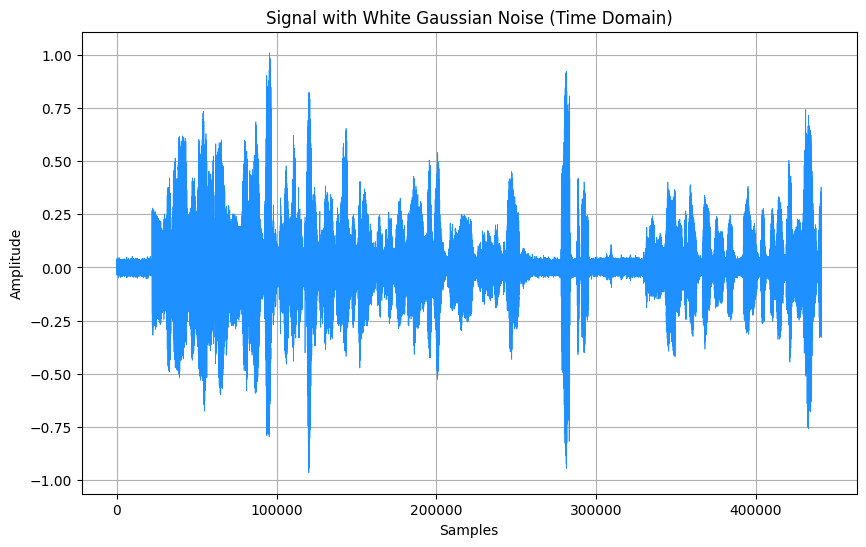

In [167]:
#Plot time domain
plt.figure(figsize=(10, 6))
plt.plot(signal_noise, color='dodgerblue', linewidth=0.5)
plt.title('Signal with White Gaussian Noise (Time Domain)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [96]:
#Applying the FFT
spectrum_noise = fft(signal_noise) #Spectrum of the signal with noise

#We take the correspondent frequencies of the samples of the Fourier transform
freq_FFT_noise = fftfreq(len(signal_noise), 1/fs)
#We take just the half positive part of the spectrum's frequencies since they are simmetric to 0 for real signals
freq_FFT_noise = freq_FFT_noise[: len(signal_noise)//2]

#Magnitude
magnitude_noise = np.abs(spectrum_noise[: len(signal_noise) // 2])
#Transforming the magnitude in decibel
magnitude_dB_noise = 20*np.log10(magnitude_noise)

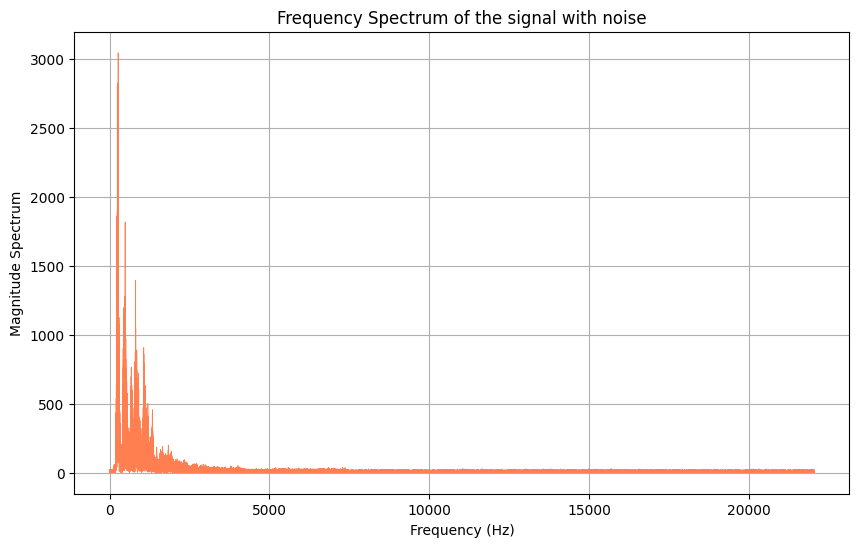

In [169]:
#Plot Magnitude Spectrum of the signal with noise
plt.figure(figsize=(10, 6))
plt.plot(freq_FFT_noise, magnitude_noise, color="coral", linewidth=0.5)
plt.title("Frequency Spectrum of the signal with noise")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude Spectrum")
plt.grid(True)
plt.show() 

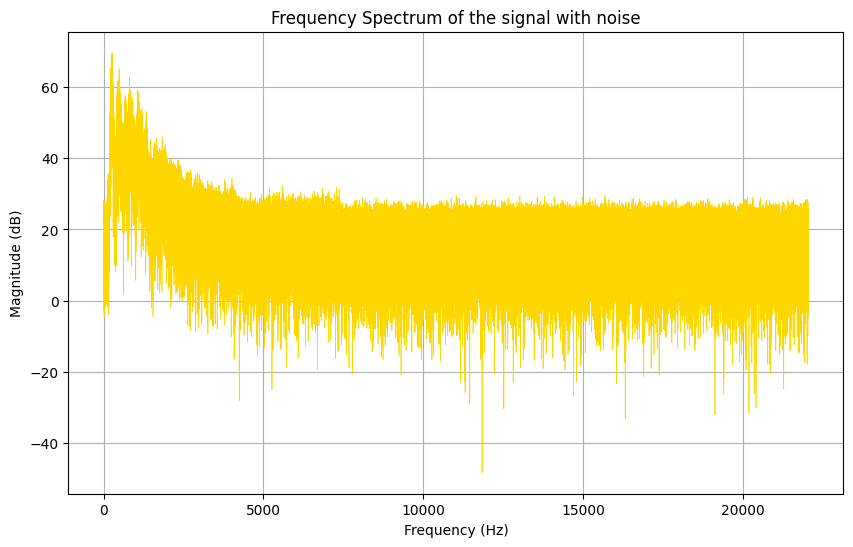

In [171]:
#Plot Magnitude (dB) of the signal with noise
plt.figure(figsize=(10, 6))
plt.plot(freq_FFT_noise, magnitude_dB_noise, color="gold", linewidth=0.5)
plt.title("Frequency Spectrum of the signal with noise")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

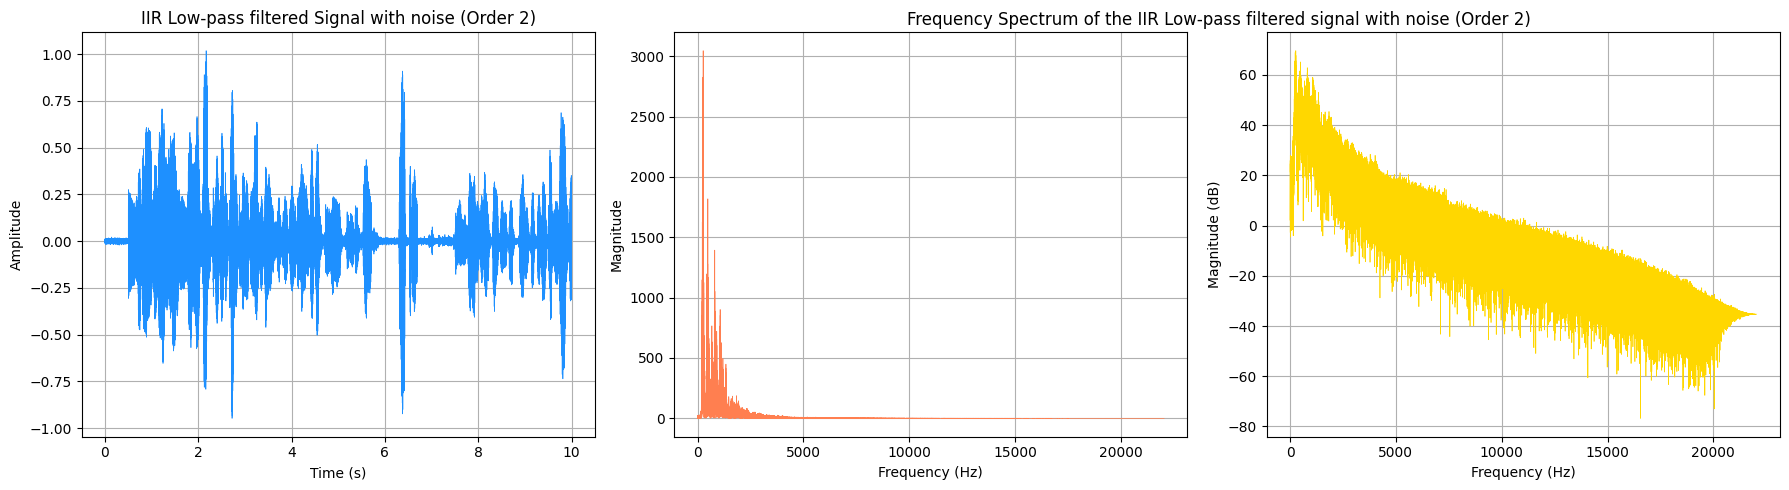

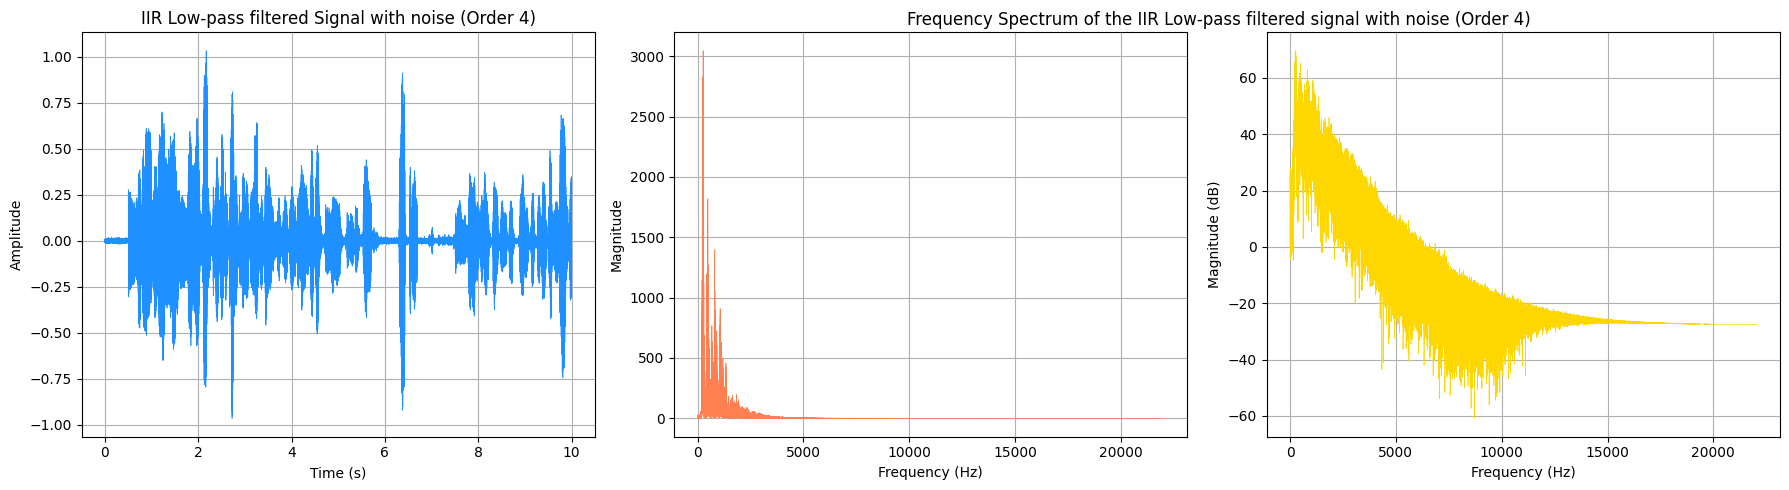

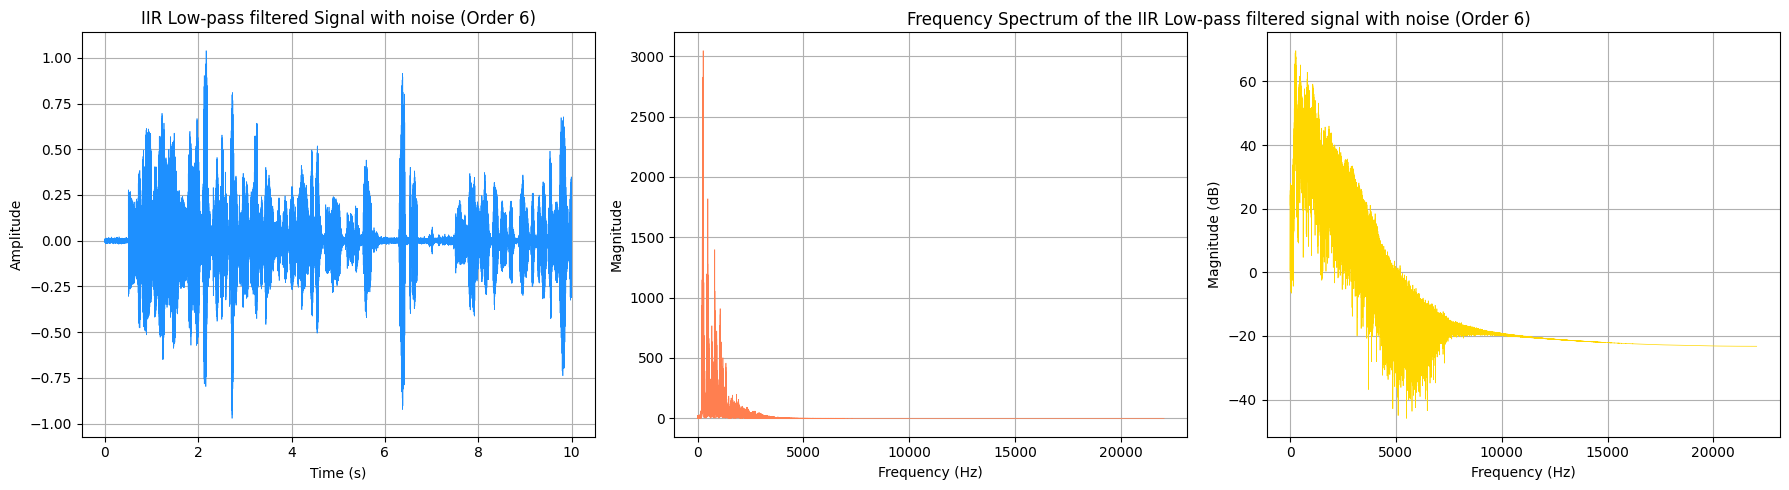

In [99]:
#Application of the IIR filters to the signal with noise:
#IIR Low-pass filtered speech signal

for order in order_values:
    low_filtered_noise = IIR_lowpass_filter(signal_noise, high_cutoff, fs, order)
    
    #Duration
    duration_low_noise = len(low_filtered_noise) / fs

    #Spectrum
    spectrum_low_noise = fft(low_filtered_noise)

    #Frequencies of the FFT
    freq_FFT_low_noise = fftfreq(len(low_filtered_noise), 1/fs)
    freq_FFT_low_noise = freq_FFT_low[: len(low_filtered_noise)//2]

    #Magnitude
    magnitude_low_noise = np.abs(spectrum_low_noise[: len(low_filtered_noise) // 2])
    #Transforming the magnitude in decibel
    magnitude_low_dB_noise = 20*np.log10(magnitude_low_noise)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_low_noise, len(low_filtered_noise)), low_filtered_noise, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"IIR Low-pass filtered Signal with noise (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_low_noise, magnitude_low_noise, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_low_noise, magnitude_low_dB_noise, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)
    
    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the IIR Low-pass filtered signal with noise (Order {order})", ha='center', fontsize=12, color="black")

    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show() 

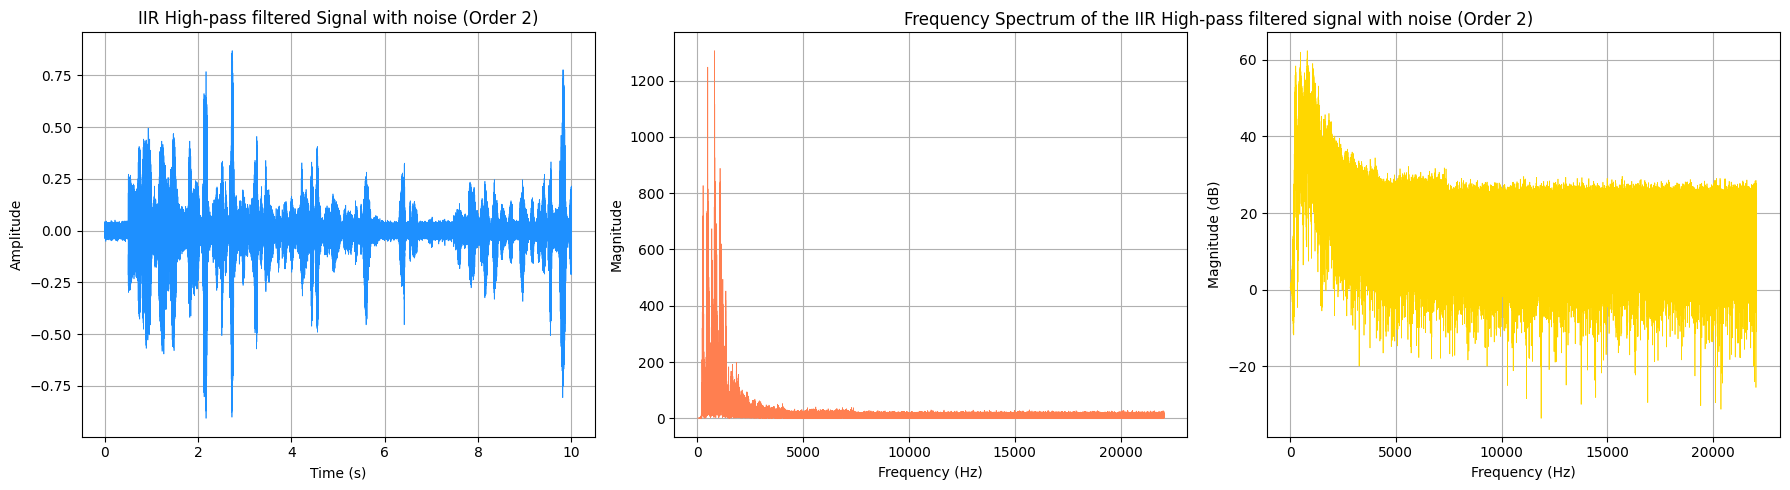

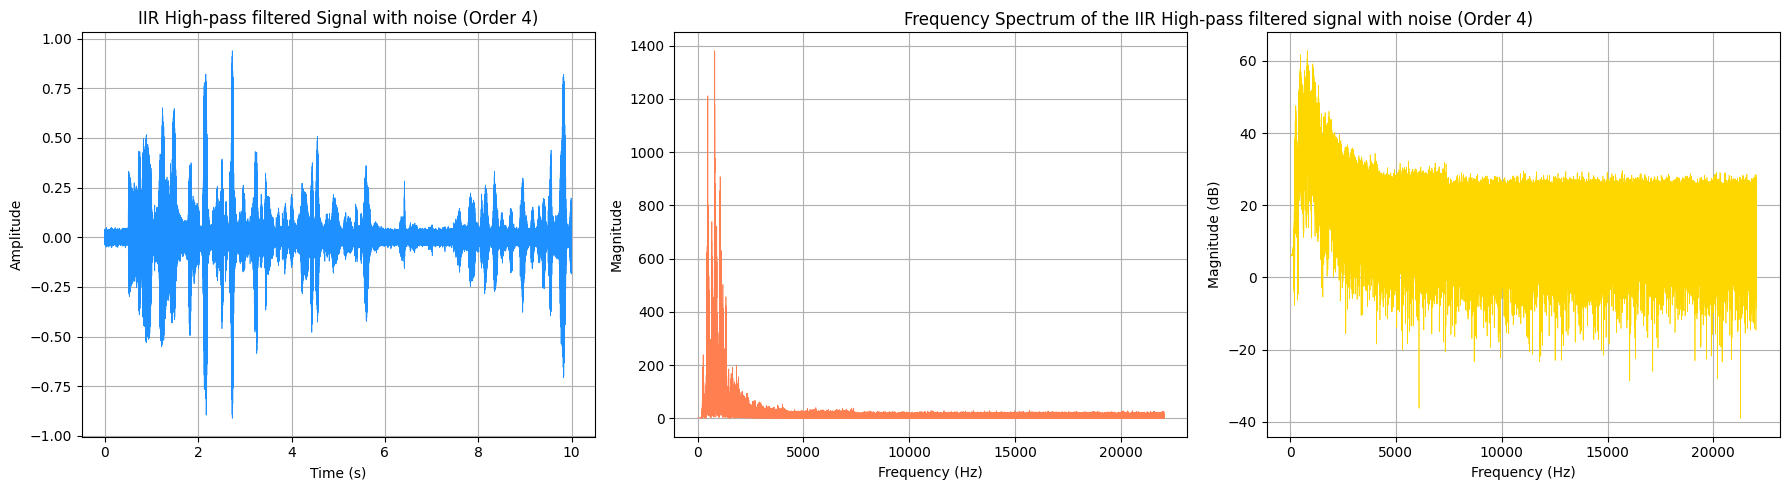

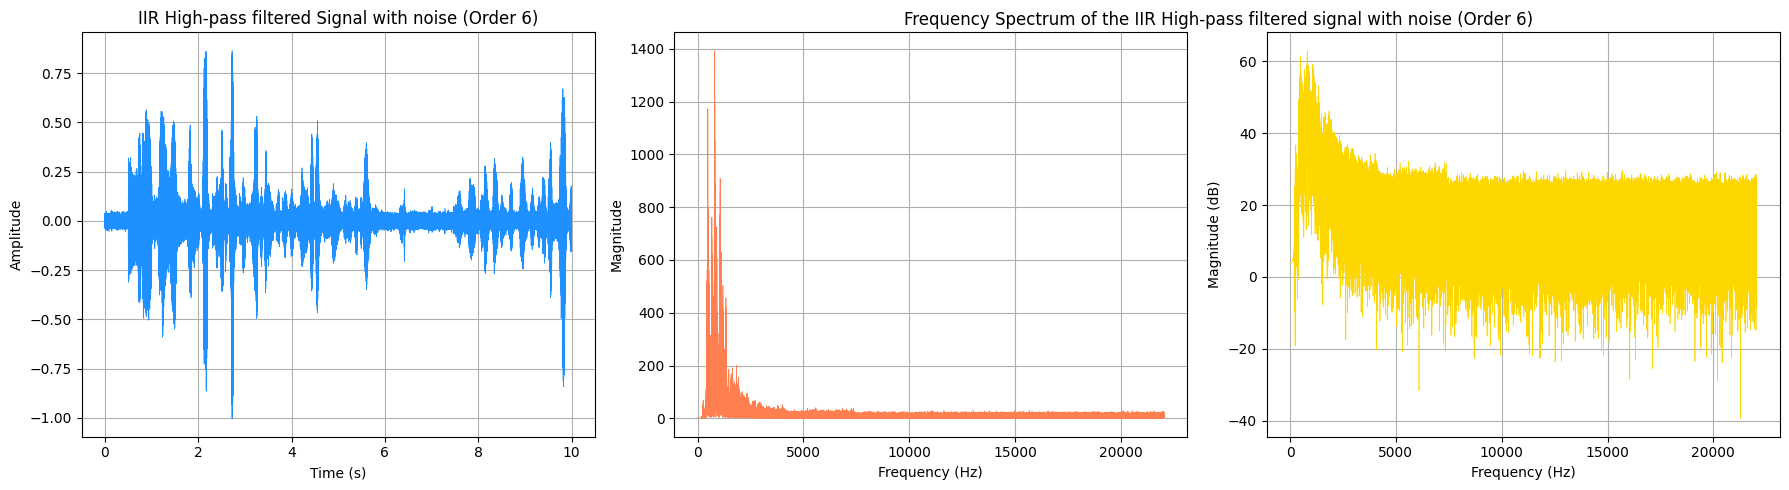

In [100]:
#IIR High-pass filtered speech signal
for order in order_values:
    high_filtered_noise = IIR_highpass_filter(signal_noise, low_cutoff, fs, order)
    
    #Duration
    duration_high_noise = len(high_filtered_noise) / fs

    #Spectrum
    spectrum_high_noise = fft(high_filtered_noise)

    #Frequencies of the FFT
    freq_FFT_high_noise = fftfreq(len(high_filtered_noise), 1/fs)
    freq_FFT_high_noise = freq_FFT_high[: len(high_filtered_noise)//2]

    #Magnitude
    magnitude_high_noise = np.abs(spectrum_high_noise[: len(high_filtered_noise) // 2])

    #Transforming the magnitude in decibel
    magnitude_high_dB_noise = 20*np.log10(magnitude_high_noise)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_high_noise, len(high_filtered_noise)), high_filtered_noise, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"IIR High-pass filtered Signal with noise (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_high_noise, magnitude_high_noise, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_high_noise, magnitude_high_dB_noise, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)

    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the IIR High-pass filtered signal with noise (Order {order})", ha='center', fontsize=12, color="black")
    
    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show() 

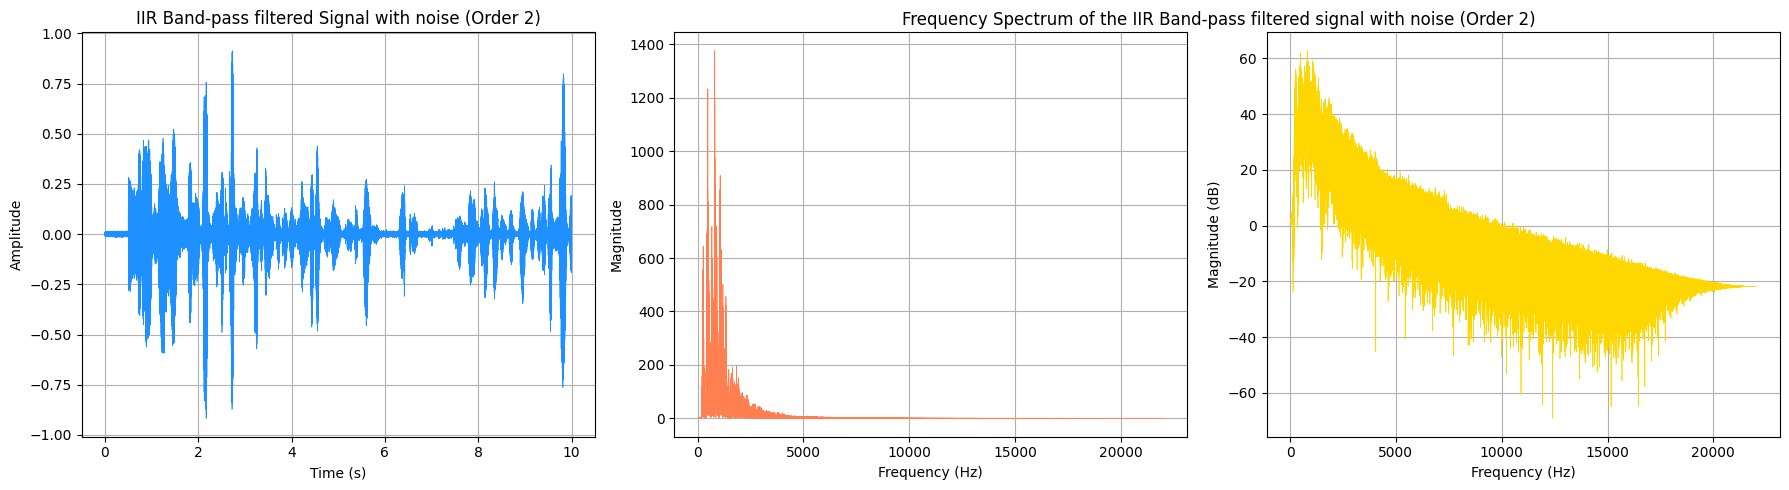

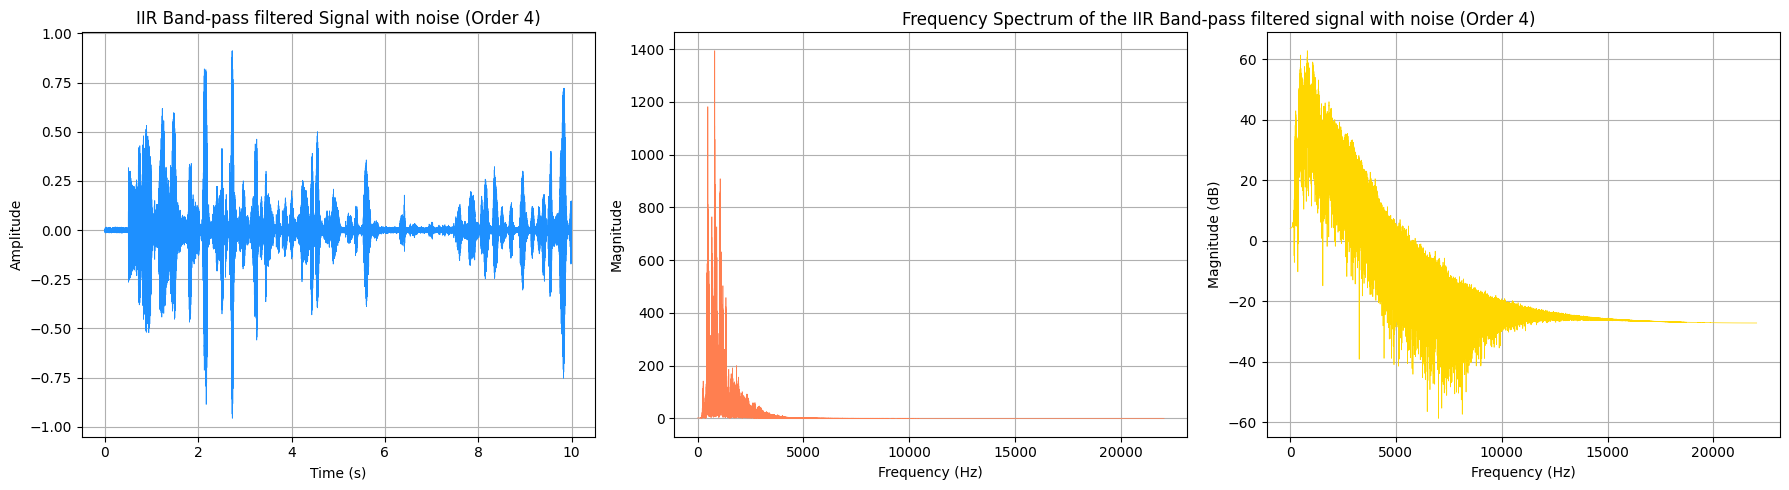

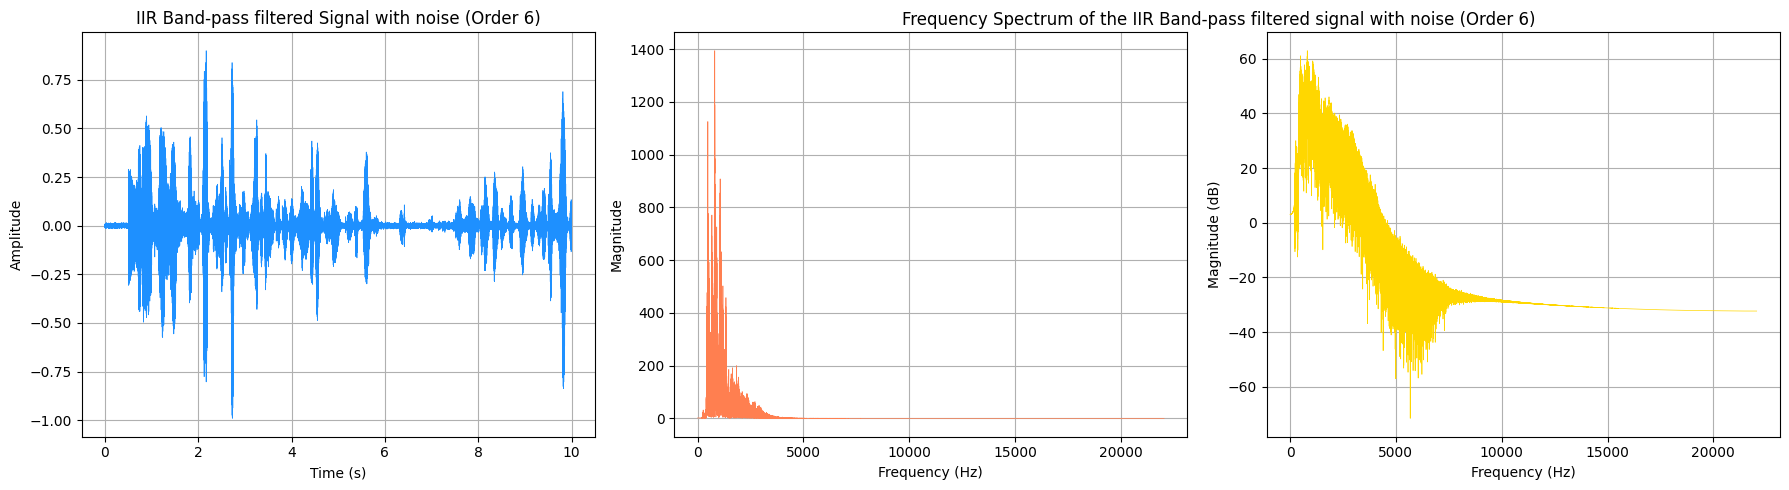

In [101]:
#IIR Band-pass filtered speech signal with noise
for order in order_values:
    band_filtered_noise = IIR_bandpass_filter(signal_noise, low_cutoff, high_cutoff, fs, order)
    
    #Duration
    duration_band_noise = len(band_filtered_noise) / fs

    #Spectrum
    spectrum_band_noise = fft(band_filtered_noise)

    #Frequencies of the FFT
    freq_FFT_band_noise = fftfreq(len(band_filtered_noise), 1/fs)
    freq_FFT_band_noise = freq_FFT_band[: len(band_filtered_noise)//2]

    #Magnitude
    magnitude_band_noise = np.abs(spectrum_band_noise[: len(band_filtered_noise) // 2])
    #Transforming the magnitude in decibel
    magnitude_band_dB_noise = 20*np.log10(magnitude_band_noise)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_band_noise, len(band_filtered_noise)), band_filtered_noise, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"IIR Band-pass filtered Signal with noise (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_band_noise, magnitude_band_noise, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_band_noise, magnitude_band_dB_noise, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)

    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the IIR Band-pass filtered signal with noise (Order {order})", ha='center', fontsize=12, color="black")
    
    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show()

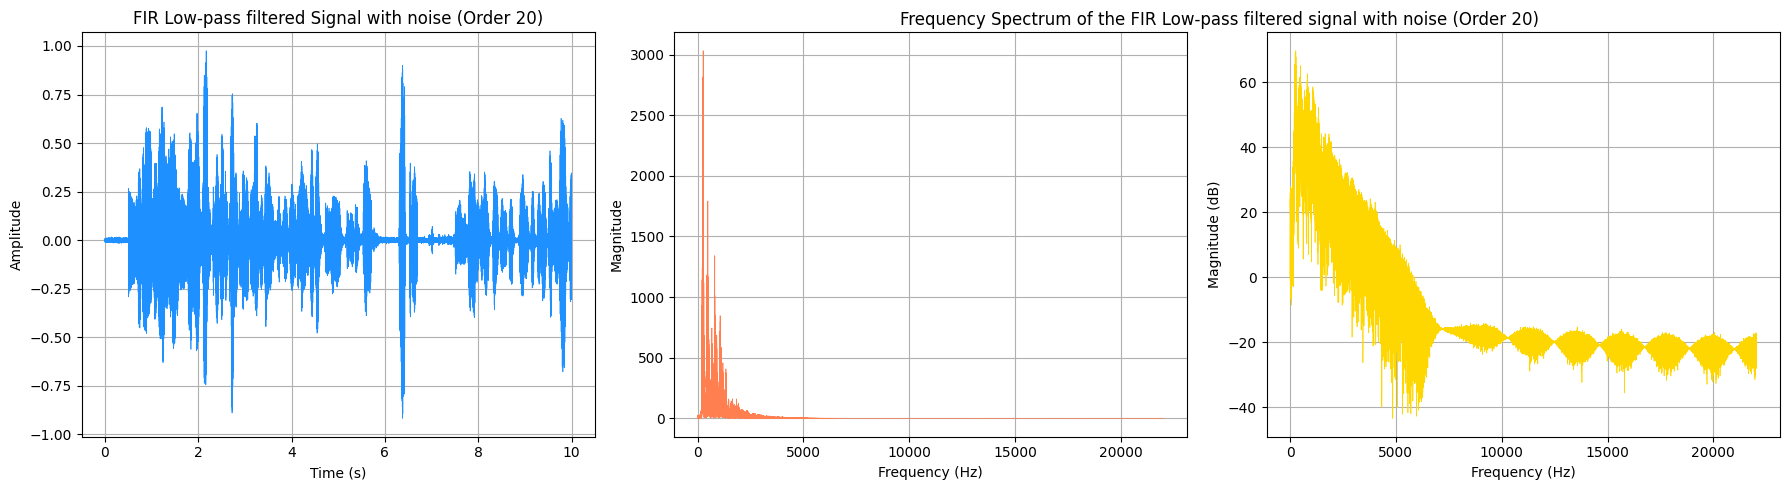

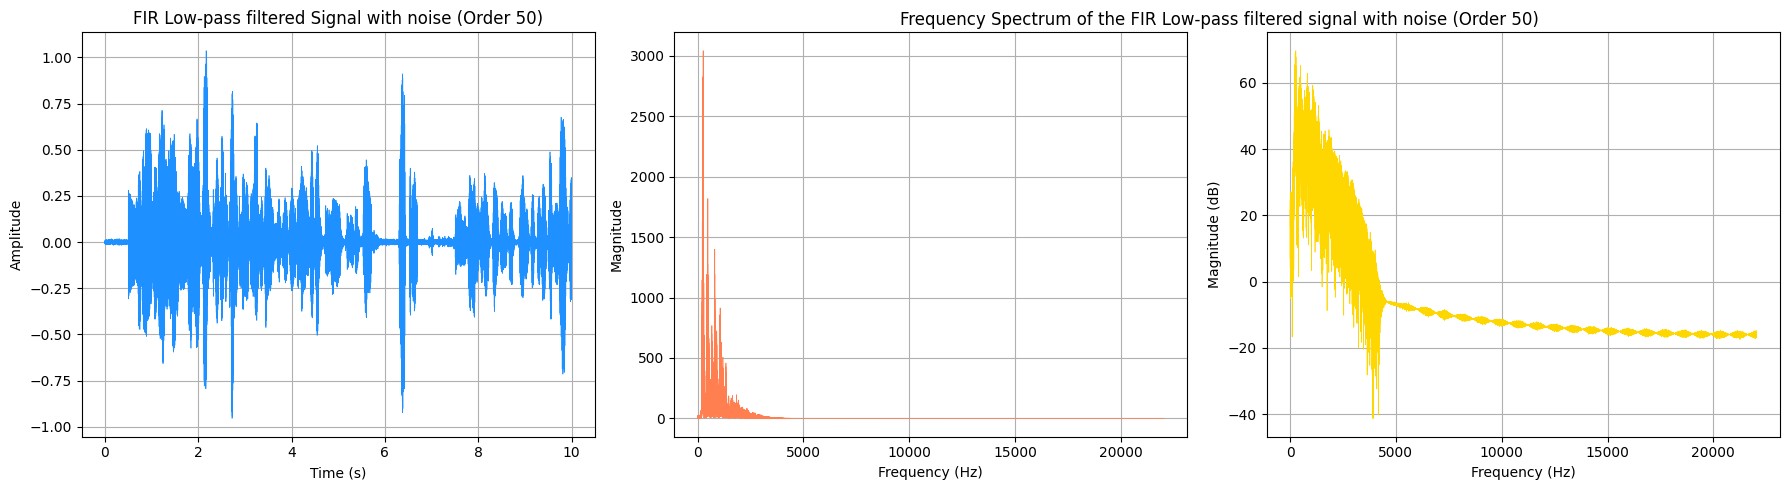

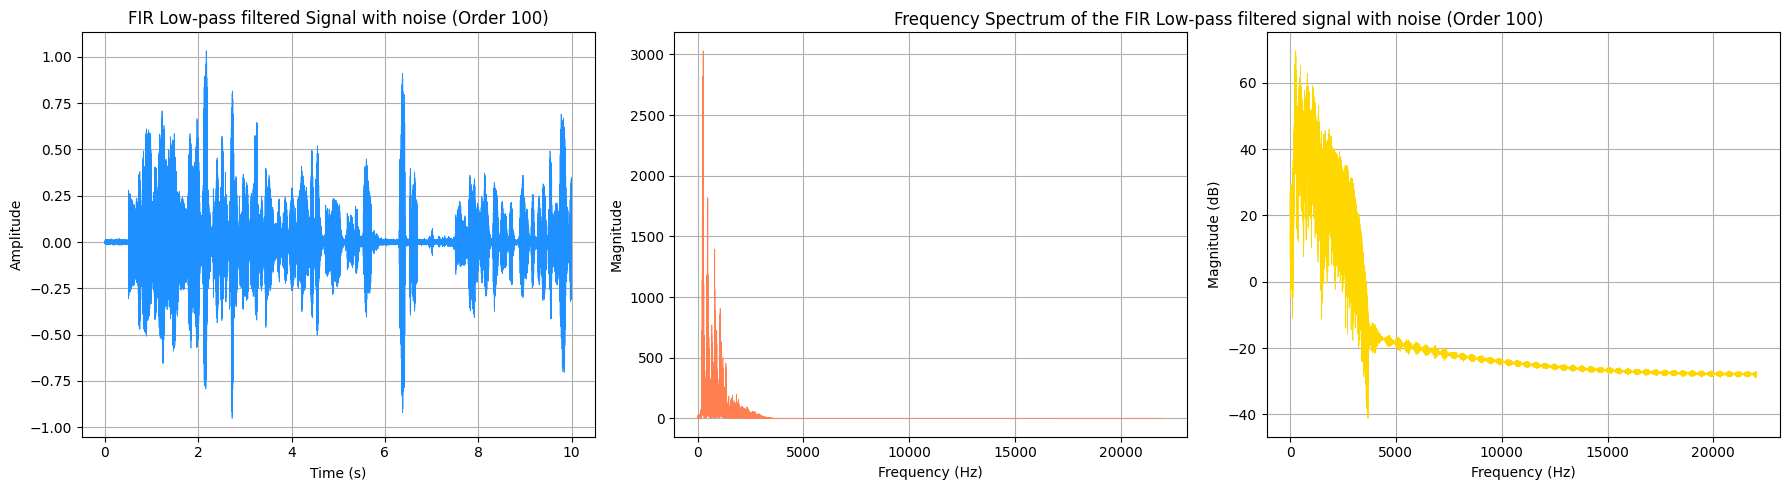

In [102]:
#FIR Low-pass filtered speech signal with noise
for order in order_values2:
    low_filtered_noise = FIR_lowpass_filter(signal_noise, high_cutoff, fs, order)
    
    #Duration
    duration_low_noise = len(low_filtered_noise) / fs

    #Spectrum
    spectrum_low_noise = fft(low_filtered_noise)

    #Frequencies of the FFT
    freq_FFT_low_noise = fftfreq(len(low_filtered_noise), 1/fs)
    freq_FFT_low_noise = freq_FFT_low_noise[: len(low_filtered_noise)//2]

    #Magnitude
    magnitude_low_noise = np.abs(spectrum_low_noise[: len(low_filtered_noise) // 2])

    #Transforming the magnitude in decibel
    magnitude_low_dB_noise = 20*np.log10(magnitude_low_noise)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_low_noise, len(low_filtered_noise)), low_filtered_noise, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"FIR Low-pass filtered Signal with noise (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_low_noise, magnitude_low_noise, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_low_noise, magnitude_low_dB_noise, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)

    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the FIR Low-pass filtered signal with noise (Order {order})", ha='center', fontsize=12, color="black")
    
    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show() 

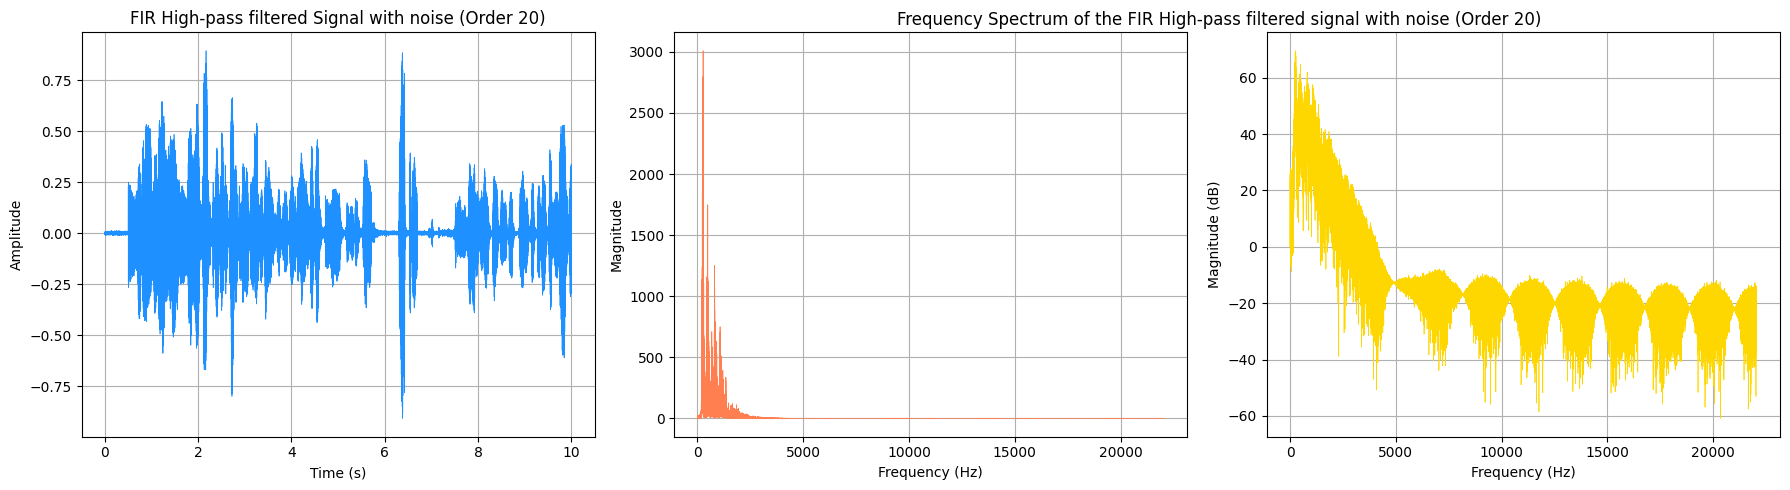

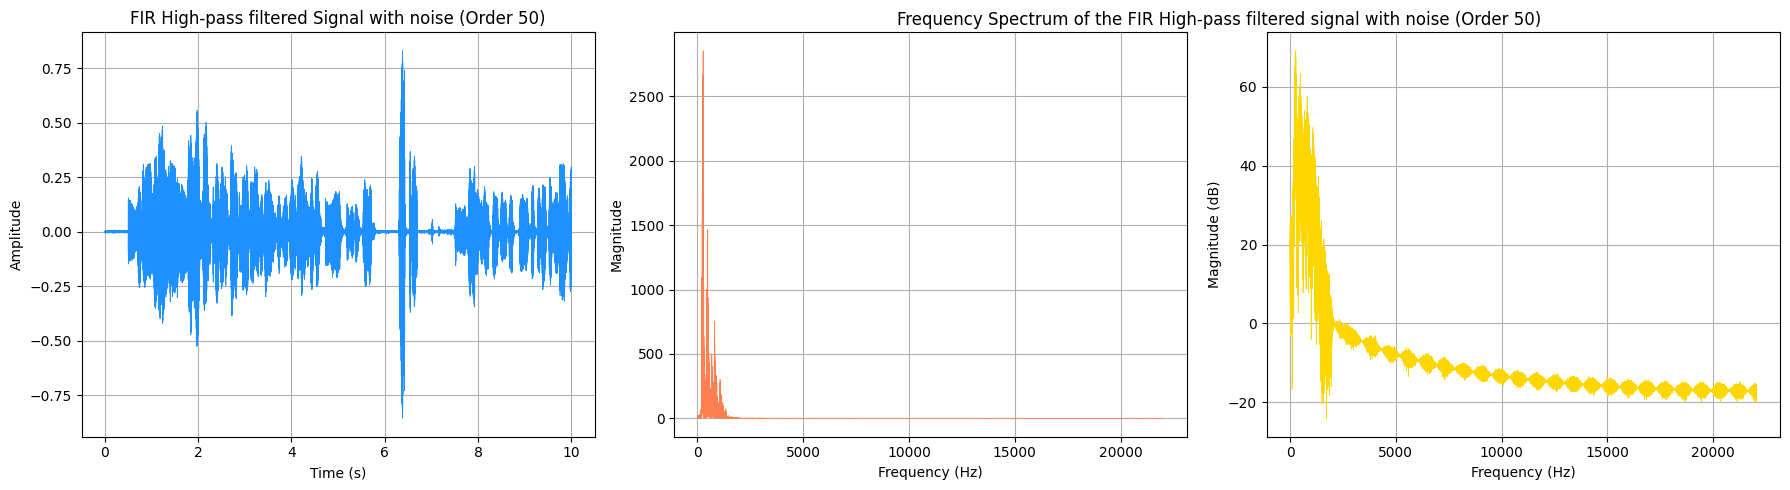

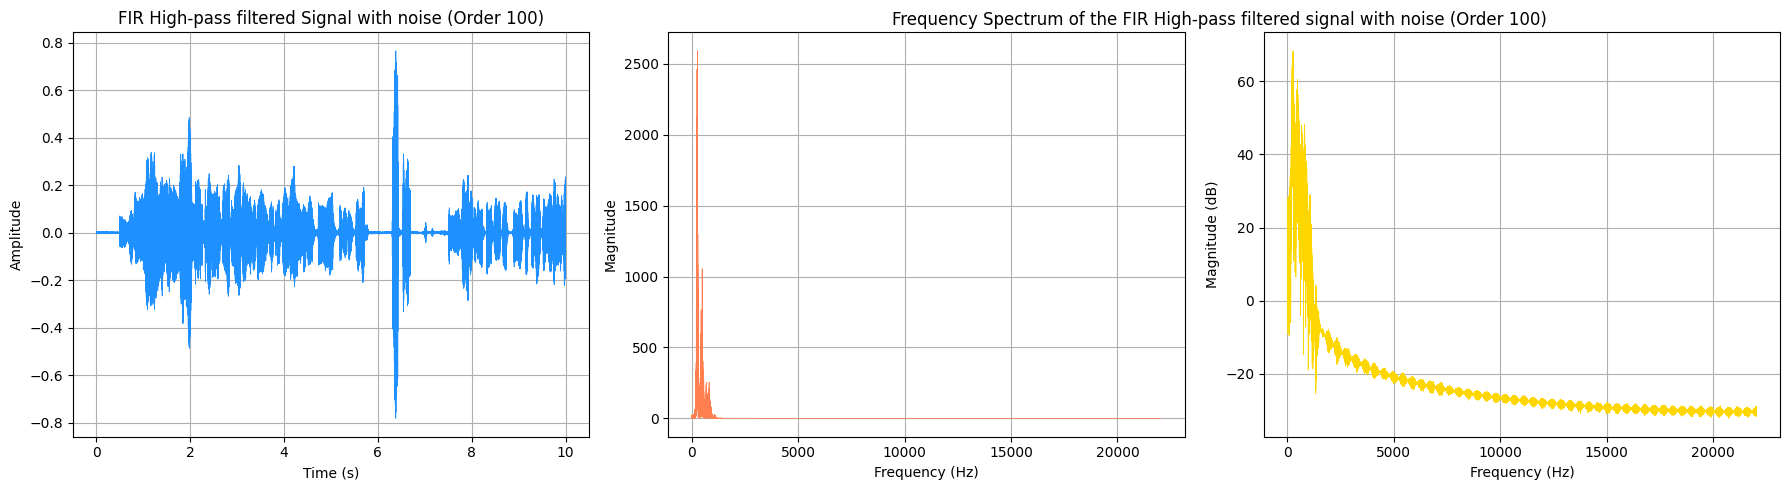

In [103]:
#FIR High-pass filtered speech signal with noise
for order in order_values2:
    high_filtered_noise = FIR_highpass_filter(signal_noise, low_cutoff, fs, order)
    
    #Duration
    duration_high_noise = len(high_filtered_noise) / fs

    #Spectrum
    spectrum_high_noise = fft(high_filtered_noise)

    #Frequencies of the FFT
    freq_FFT_high_noise = fftfreq(len(high_filtered_noise), 1/fs)
    freq_FFT_high_noise = freq_FFT_high_noise[: len(high_filtered_noise)//2]

    #Magnitude
    magnitude_high_noise = np.abs(spectrum_high_noise[: len(high_filtered_noise) // 2])

    #Transforming the magnitude in decibel
    magnitude_high_dB_noise = 20*np.log10(magnitude_high_noise)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_high_noise, len(high_filtered_noise)), high_filtered_noise, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"FIR High-pass filtered Signal with noise (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_high_noise, magnitude_high_noise, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_high_noise, magnitude_high_dB_noise, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)

    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the FIR High-pass filtered signal with noise (Order {order})", ha='center', fontsize=12, color="black")
    
    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show() 

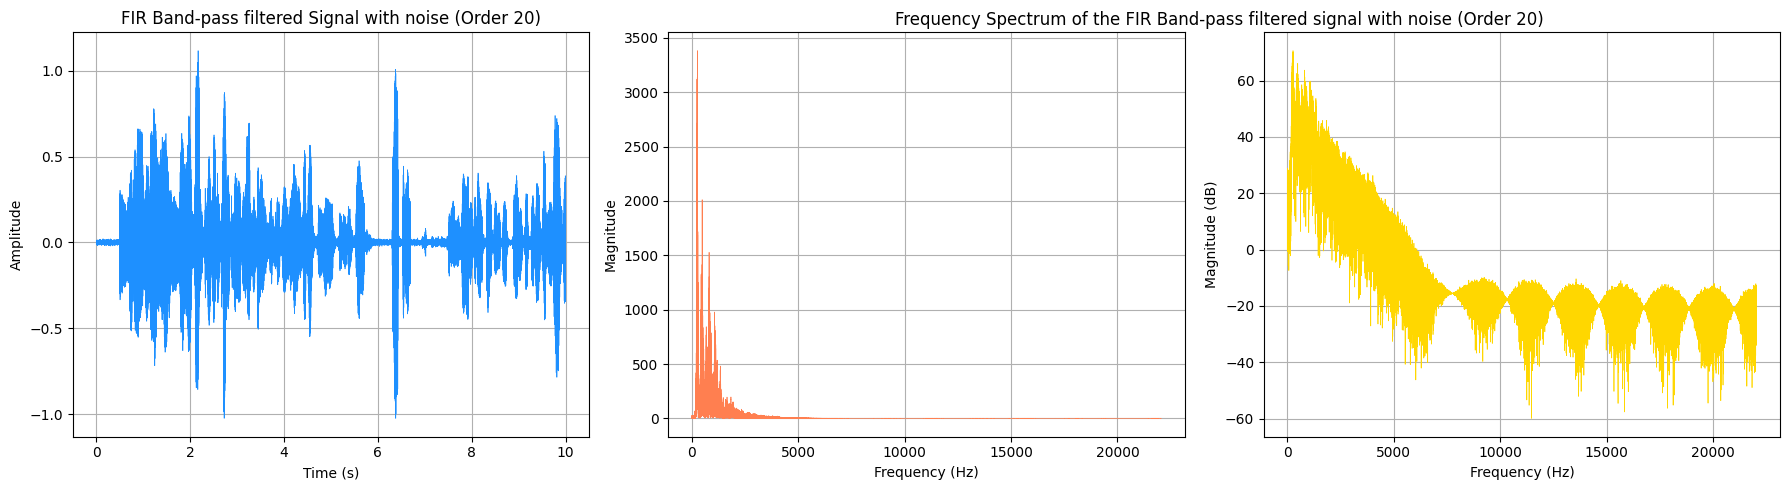

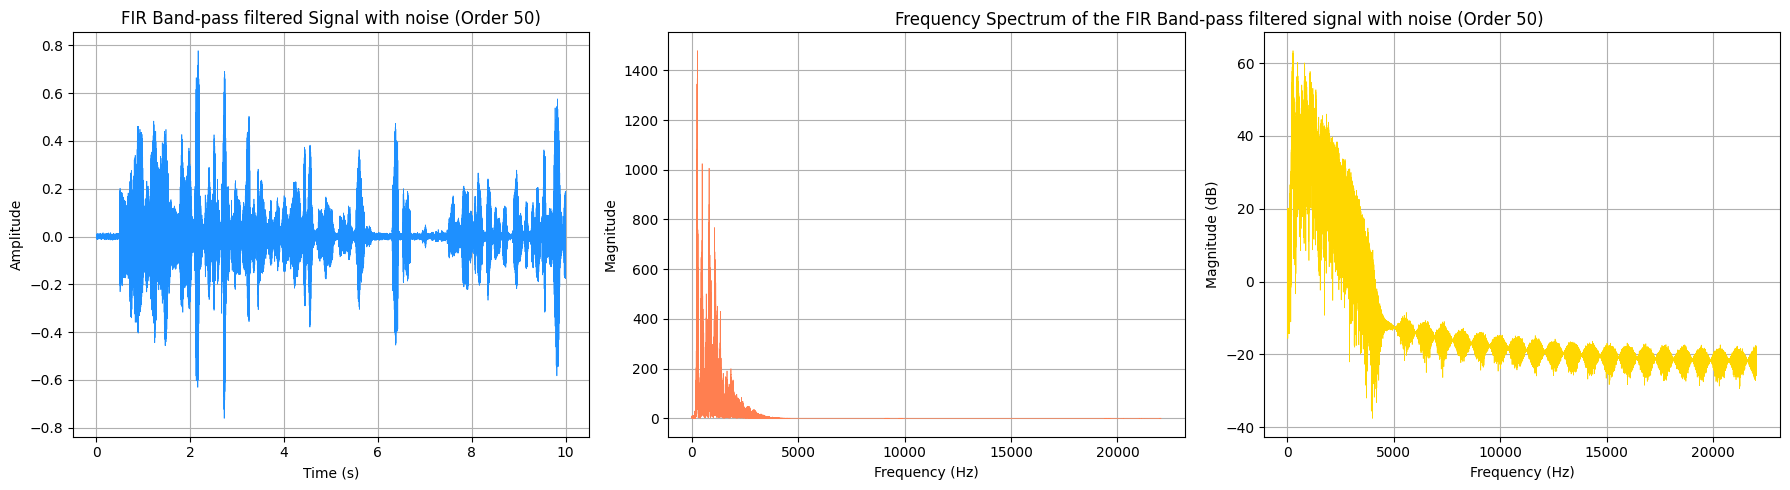

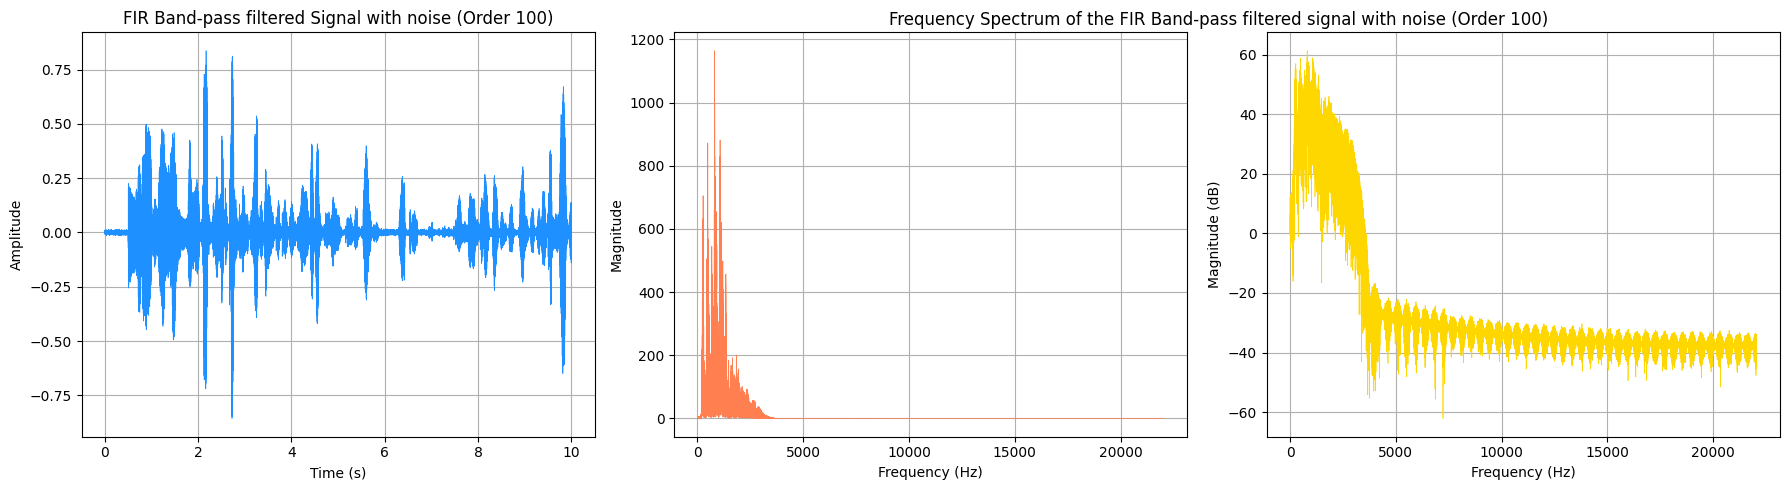

In [104]:
#FIR Band-pass filtered speech signal
for order in order_values2:
    band_filtered_noise = FIR_bandpass_filter(signal_noise, low_cutoff, high_cutoff, fs, order)
    
    #Duration
    duration_band_noise = len(band_filtered_noise) / fs

    #Spectrum
    spectrum_band_noise = fft(band_filtered_noise)

    #Frequencies of the FFT
    freq_FFT_band_noise = fftfreq(len(band_filtered_noise), 1/fs)
    freq_FFT_band_noise = freq_FFT_band_noise[: len(band_filtered_noise)//2]

    #Magnitude
    magnitude_band_noise = np.abs(spectrum_band_noise[: len(band_filtered_noise) // 2])
    
    #Transforming the magnitude in decibel
    magnitude_band_dB_noise = 20*np.log10(magnitude_band_noise)

    #Plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    #Plot time domain
    axs[0].plot(np.linspace(0, duration_band_noise, len(band_filtered_noise)), band_filtered_noise, color='dodgerblue', linewidth=0.5)
    axs[0].set_title(f"FIR Band-pass filtered Signal with noise (Order {order})")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    #Plot Magnitude Spectrum
    axs[1].plot(freq_FFT_band_noise, magnitude_band_noise, color="coral", linewidth=0.5)
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].grid(True)
    
    #Plot Magnitude in dB
    axs[2].plot(freq_FFT_band_noise, magnitude_band_dB_noise, color="gold", linewidth=0.5)
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Magnitude (dB)")
    axs[2].grid(True)

    #Title of the second and third graphs
    fig.text(0.68, 0.94, f"Frequency Spectrum of the FIR Band-pass filtered signal with noise (Order {order})", ha='center', fontsize=12, color="black")
    
    #Space between subplots
    plt.subplots_adjust(wspace=0.4) #Space within the graphs of a subplot
    plt.tight_layout()
    plt.show() 

### 5. Part 5: Evaluation and Analysis
- Performance Evaluation:
  - For each filter type and order, evaluate the effectiveness of the FIR and IIR filters by computing the signal-to-noise ratio (SNR) before and after filtering for both the clean and noisy signals.
  - Analyze the trade-offs between FIR and IIR filters:
    - How does increasing the filter order affect the quality of the filtered signal for each filter type?
    - How do FIR and IIR filters differ in handling the voice signal (e.g., phase delay, smoothness, ripple)?
    - Which filter type (low-pass, high-pass, band-pass) and filter type (FIR, IIR) works best for this voice signal?

- Discussion and Conclusion:
  - Discuss the results of your analysis, focusing on how filter order and type (FIR vs. IIR) influence the filtering outcome for both clean and noisy signals.
  - Conclude which filter (FIR or IIR) works better in different contexts (clean vs. noisy signal) and justify your choice based on the observed performance metrics (e.g., SNR, signal distortion, computational cost).

In [130]:
#SNR for the clean signal without noise
SNR_ecg = 10 * np.log10(np.sum(speech_signal**2)/np.var(speech_signal))

#SNR for the original signal filtered with IIR filters

SNR_ecg_IIR_lowpass = []
SNR_ecg_IIR_highpass = []
SNR_ecg_IIR_bandpass = []

for order in order_values:

    #IIR Low-pass filter
    low_filtered_speech = IIR_lowpass_filter(speech_signal, high_cutoff, fs, order)
    snr_low = 10 * np.log10(np.sum(low_filtered_speech**2)/np.var(low_filtered_speech))
    SNR_ecg_IIR_lowpass.append(snr_low)
    
    #IIR High-pass filter
    high_filtered_speech = IIR_highpass_filter(speech_signal, low_cutoff, fs, order)
    snr_high = 10 * np.log10(np.sum(high_filtered_speech**2)/np.var(high_filtered_speech))
    SNR_ecg_IIR_highpass.append(snr_high)
    
    #IIR Band-pass filter
    band_filtered_speech = IIR_bandpass_filter(speech_signal, low_cutoff, high_cutoff, fs, order)
    snr_band = 10 * np.log10(np.sum(band_filtered_speech**2)/np.var(band_filtered_speech))
    SNR_ecg_IIR_bandpass.append(snr_band)

#SNR for the original signal filtered with FIR filters

SNR_ecg_FIR_lowpass = []
SNR_ecg_FIR_highpass = []
SNR_ecg_FIR_bandpass = []

for order in order_values2:

    #FIR Low-pass filter
    low_filtered_speech = FIR_lowpass_filter(speech_signal, high_cutoff, fs, order)
    snr_low = 10 * np.log10(np.sum(low_filtered_speech**2)/np.var(low_filtered_speech))
    SNR_ecg_FIR_lowpass.append(snr_low)

    #FIR High-pass filter
    high_filtered_speech = FIR_highpass_filter(speech_signal, low_cutoff, fs, order)
    snr_high = 10 * np.log10(np.sum(high_filtered_speech**2)/np.var(high_filtered_speech))
    SNR_ecg_FIR_highpass.append(snr_high)
    
    #FIR Band-pass filter
    band_filtered_speech = FIR_bandpass_filter(speech_signal, low_cutoff, high_cutoff, fs, order)
    snr_band = 10 * np.log10(np.sum(band_filtered_speech**2)/np.var(band_filtered_speech))
    SNR_ecg_FIR_bandpass.append(snr_band)

In [136]:
#Take a look
print('SNR clean signal:', SNR_ecg)
print('SNR IIR Low-Pass clean signal:', SNR_ecg_IIR_lowpass)
print('SNR IIR High-Pass clean signal:', SNR_ecg_IIR_highpass)
print('SNR IIR Band-Pass clean signal:', SNR_ecg_IIR_bandpass)
print('SNR FIR Low-Pass clean signal:', SNR_ecg_FIR_lowpass)
print('SNR FIR High-Pass clean signal:', SNR_ecg_FIR_highpass)
print('SNR FIR Band-Pass clean signal:', SNR_ecg_FIR_bandpass)

SNR clean signal: 56.444387435913086
SNR IIR Low-Pass clean signal: [56.44438594548997, 56.44438594264084, 56.44438593792494]
SNR IIR High-Pass clean signal: [56.44438589813809, 56.44438590614322, 56.444385902228255]
SNR IIR Band-Pass clean signal: [56.44438589893472, 56.44438590263486, 56.44438590093114]
SNR FIR Low-Pass clean signal: [56.44438593682879, 56.444385899365315, 56.44438591945837]
SNR FIR High-Pass clean signal: [56.44438593853137, 56.44438590090352, 56.44438591465792]
SNR FIR Band-Pass clean signal: [56.44438593623682, 56.44438589783132, 56.4443859114386]


In [134]:
#Function to calculate the Signal-to-Noise Ratio
def snr_fun(noisy_signal, noise_power):
    signal_power = np.mean(noisy_signal**2)
    snr_value = 10 * np.log10(signal_power / noise_power)
    return snr_value

#SNR for the noisy signal

SNR_noise = snr_fun(signal_noise, noise_power)

#SNR for the noisy signal filtered with IIR filters

SNR_noisy_IIR_lowpass = []
SNR_noisy_IIR_highpass = []
SNR_noisy_IIR_bandpass = []

for order in order_values2:

    #IIR Low-pass filter
    low_filtered_noisy = IIR_lowpass_filter(signal_noise, high_cutoff, fs, order)
    snr_low = snr_fun(low_filtered_noise, noise_power)
    SNR_noisy_IIR_lowpass.append(snr_low)

    #IIR High-pass filter
    high_filtered_noisy = IIR_highpass_filter(signal_noise, low_cutoff, fs, order)
    snr_high = snr_fun(high_filtered_noise, noise_power)
    SNR_noisy_IIR_highpass.append(snr_high)
    
    #IIR Band-pass filter
    band_filtered_noisy = IIR_bandpass_filter(signal_noise, low_cutoff, high_cutoff, fs, order)
    snr_band = snr_fun(band_filtered_noise, noise_power)
    SNR_noisy_IIR_bandpass.append(snr_band)

#SNR for the original signal filtered with FIR filters

SNR_noisy_FIR_lowpass = []
SNR_noisy_FIR_highpass = []
SNR_noisy_FIR_bandpass = []

for order in order_values2:

    #FIR Low-pass filter
    low_filtered_noisy = FIR_lowpass_filter(signal_noise, high_cutoff, fs, order)
    snr_low = snr_fun(low_filtered_noise, noise_power)
    SNR_noisy_FIR_lowpass.append(snr_low)

    #FIR High-pass filter
    high_filtered_noisy = FIR_highpass_filter(signal_noise, low_cutoff, fs, order)
    snr_high = snr_fun(high_filtered_noise, noise_power)
    SNR_noisy_FIR_highpass.append(snr_high)
    
    #FIR Band-pass filter
    band_filtered_noisy = FIR_bandpass_filter(signal_noise, low_cutoff, high_cutoff, fs, order)
    snr_band = snr_fun(band_filtered_noise, noise_power)
    SNR_noisy_FIR_bandpass.append(snr_band)

In [172]:
#Take a look
print('SNR noisy signal:', SNR_noise)
print('SNR IIR Low-Pass noisy signal:', SNR_noisy_IIR_lowpass)
print('SNR IIR High-Pass noisy signal:', SNR_noisy_IIR_highpass)
print('SNR IIR Band-Pass noisy signal:', SNR_noisy_IIR_bandpass)
print('SNR FIR Low-Pass noisy signal:', SNR_noisy_FIR_lowpass)
print('SNR FIR High-Pass noisy signal:', SNR_noisy_FIR_highpass)
print('SNR FIR Band-Pass noisy signal:', SNR_noisy_FIR_bandpass)

SNR noisy signal: 20.040905589163994
SNR IIR Low-Pass noisy signal: [19.971267300560488, 19.971267300560488, 19.971267300560488]
SNR IIR High-Pass noisy signal: [16.495755146934023, 16.495755146934023, 16.495755146934023]
SNR IIR Band-Pass noisy signal: [14.940101164110324, 14.940101164110324, 14.940101164110324]
SNR FIR Low-Pass noisy signal: [19.971267300560488, 19.971267300560488, 19.971267300560488]
SNR FIR High-Pass noisy signal: [16.495755146934023, 16.495755146934023, 16.495755146934023]
SNR FIR Band-Pass noisy signal: [14.940101164110324, 14.940101164110324, 14.940101164110324]
